In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import NeuroSAGE as NS

%matplotlib inline

pd.set_option('display.max_rows', 300)

In [2]:
# set ap threshold line
ap_thresh = -35

In [3]:
# load dataset with measures of firing properties
data = pd.read_csv("preprocessed_data_efeatures.csv")

In [4]:
# neuron information for its identification
neuron_id_info = ['date', 'slice id', 'state']

In [5]:
def round_current(row):
    '''
    For each type of experiment, step current increment was different.
    We round off following it.
    '''
    inc = {'fi':20.0, 'rmih':50.0, 'tburst':50.0}[row['protocol']]
    return round(row['step current']/inc)*inc

In [6]:
data.columns

Index(['Unnamed: 0', 'AP_amplitude', 'AHP_depth', 'AP_duration_half_width',
       'AP_width', 'AP_count', 'time_to_first_spike', 'inv_first_ISI',
       'inv_second_ISI', 'inv_last_ISI', 'adaptation_index2', 'voltage_base',
       'voltage_after_stim', 'AP_count_before_stim', 'AP_count_after_stim',
       'max_amp_difference', 'clustering_index', 'fast_AHP', 'protocol',
       'filename', 'file key', 'bias current', 'step current', 'total current',
       'stim dur', 'time stamp', 'AP1_amp_rev', 'AP2_amp_rev', 'sag_amplitude',
       'voltage_deflection', 'input_resistance', 'AP1_amp', 'AP2_amp', 'state',
       'slice id', 'date'],
      dtype='object')

In [7]:
def print_traces(data):
    for k, g in data.groupby(neuron_id_info):
        print (*k)
        for k1, g1 in g.groupby('filename'):
            print (k1)

            nrow = int(g1.shape[0] / 2)+1

            fig = plt.figure()
            fig.set_size_inches(8.5, 4 * nrow)

            f = NS.FileReader(k1, filter_flag=True)

            g1.set_index('file key', inplace=True)

            for i, fk in enumerate(g1.index):
                trace = f.read_voltage_trace(f.keys.index(fk))
                plt.subplot(nrow, 2, i+1)
                plt.title(fk)
                plt.plot(trace[:, 0], trace[:, 1])

                hold_v = round(f.holding_voltage(f.keys.index(fk)), 1)
                stepl = g1.loc[fk, 'stim dur'] #f.step_length(f.keys.index(fk))
                v_last = round(np.mean(trace[np.logical_and(trace[:, 0] >= 2700, trace[:, 0] <= 2800), 1]), 1)
                #print (stepl)
                s = 'step ' + g1.loc[fk, 'step current'].astype(str) + ' pA' + \
                '\nstep ' + str(stepl) + ' ms' + \
                '\nlast-100ms-volt. ' + str(v_last) + ' mV' + \
                '\nHolding volt. ' + str(hold_v) + ' mV' + \
                '\nAP count ' + str(g1.loc[fk, 'AP_count_after_stim'])

                plt.annotate(s, (3000, -50))
                plt.xlim([2800, 3500]) 
                plt.ylim([-75, -30])

                plt.plot([0, 4000], [ap_thresh, ap_thresh])
            plt.show()

        print('\n')

In [8]:
# round off for step current amplitudes
data['step current'] = data.apply(round_current, axis=1)

# round off for bias current amplitudes
data['bias current'] = data['bias current'].apply( lambda x : round(x/10.0)*10.0 )

# recalculate the total current
data['total current'] = data['total current'].apply( lambda x : round(x/20.0)*20.0 )

Filter in only the neurons whose traces were selected manually

In [9]:
# the traces selected manually
data_selection = pd.read_csv('data_selection.csv') 

# get neuron information
neuron_selection = data_selection[neuron_id_info].drop_duplicates()

# drop neurons which are not good
data = data.merge(neuron_selection, on=neuron_id_info, how='inner')

In [10]:
data = data[['file key', 'filename', 'protocol', 'state', 'slice id', 'date', 'step current', 'stim dur', 'AP_count_after_stim']]

# sag

In [11]:
# show 2s long traces only
data_sag_2s = data[data['protocol'] == 'rmih']

2018-02-21 Slice1c2 control
dataset/2018-02-21_NS/2018-02-21 Slice1c2RmIh.hdf5


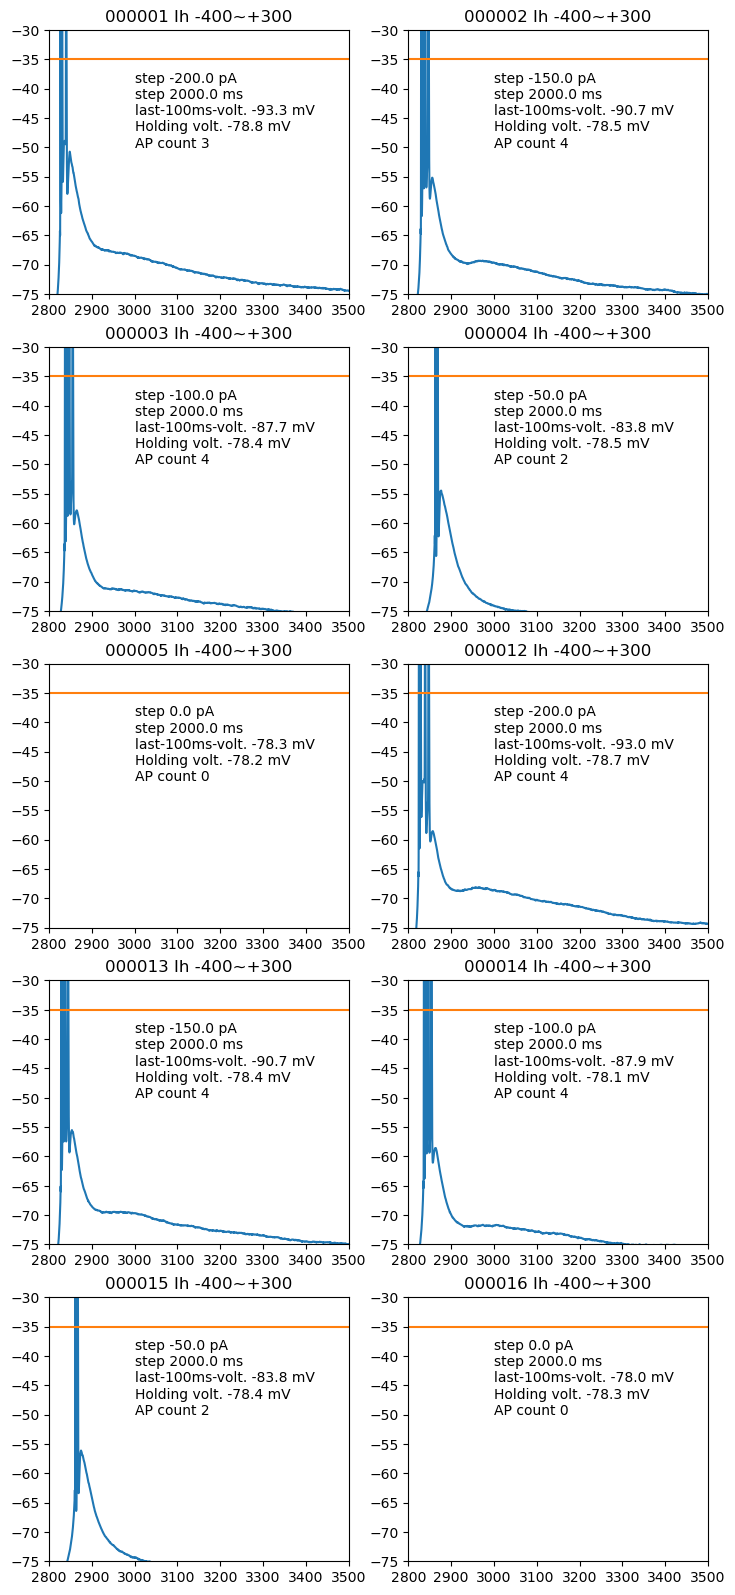



2018-02-21 Slice1c3 control
dataset/2018-02-21_NS/2018-02-21 Slice1c3RmIh.hdf5


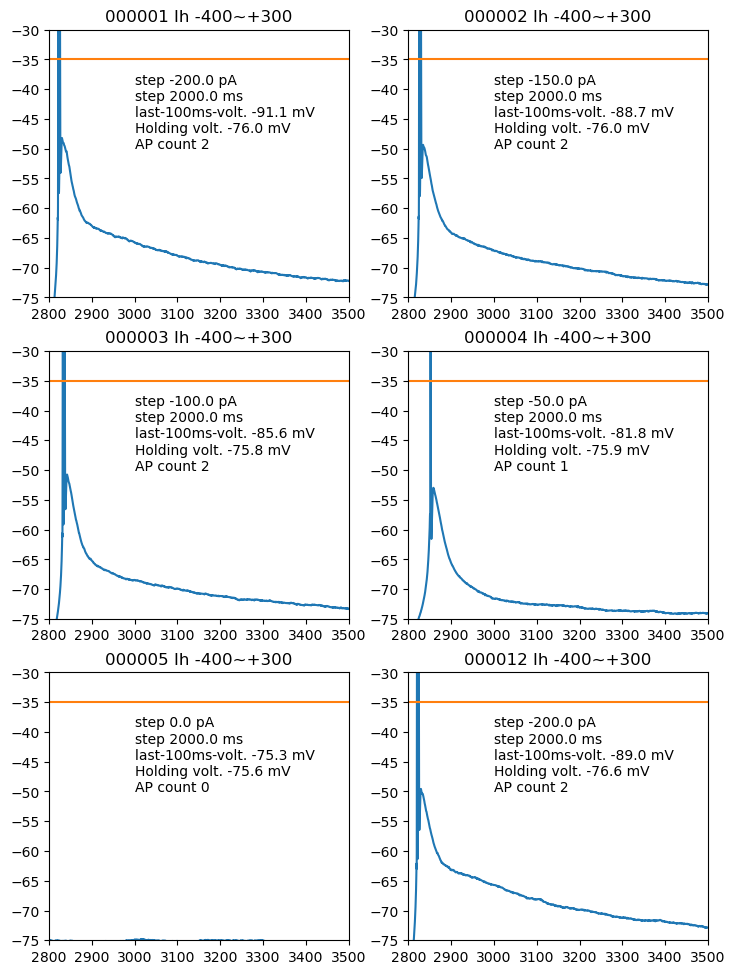

dataset/2018-02-21_NS/2018-02-21 Slice1c3RmIh_2.hdf5


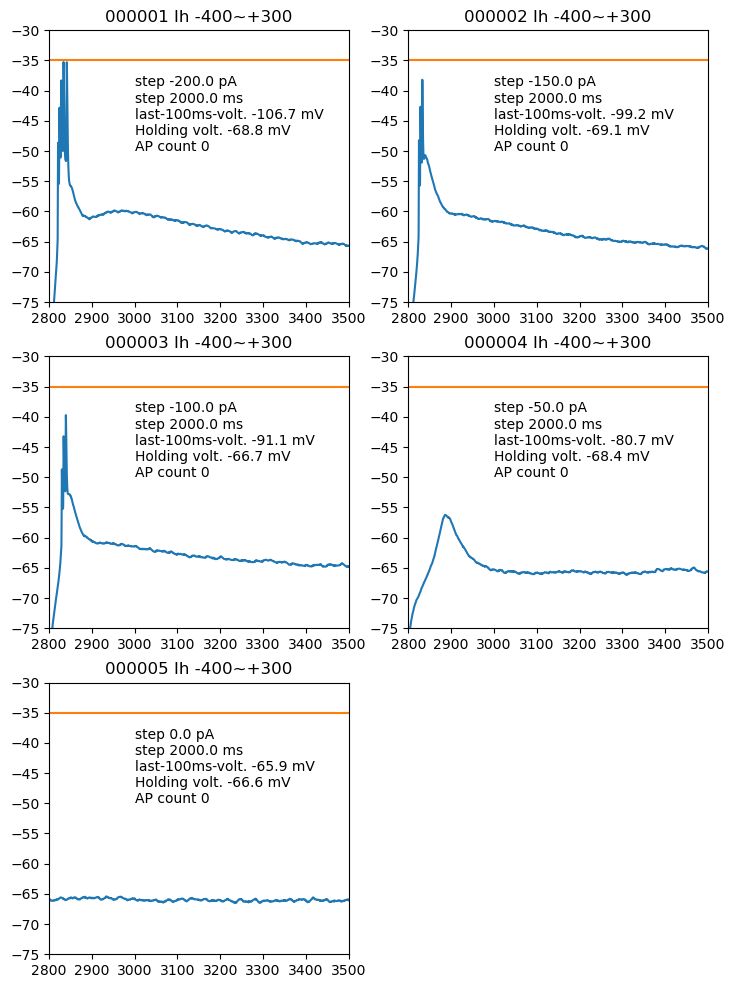



2018-03-21 Slice1c2 control
dataset/2018-03-21_NS/2018-03-21 Slice1c2 RmIh.hdf5


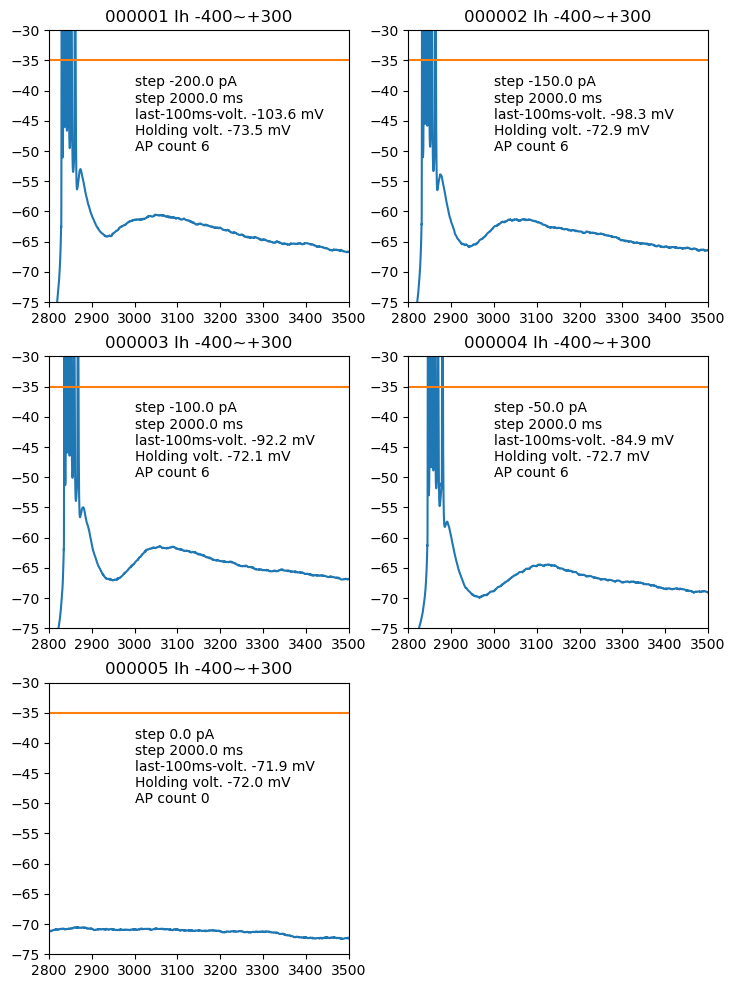

dataset/2018-03-21_NS/2018-03-21 Slice1c2 RmIh_2.hdf5


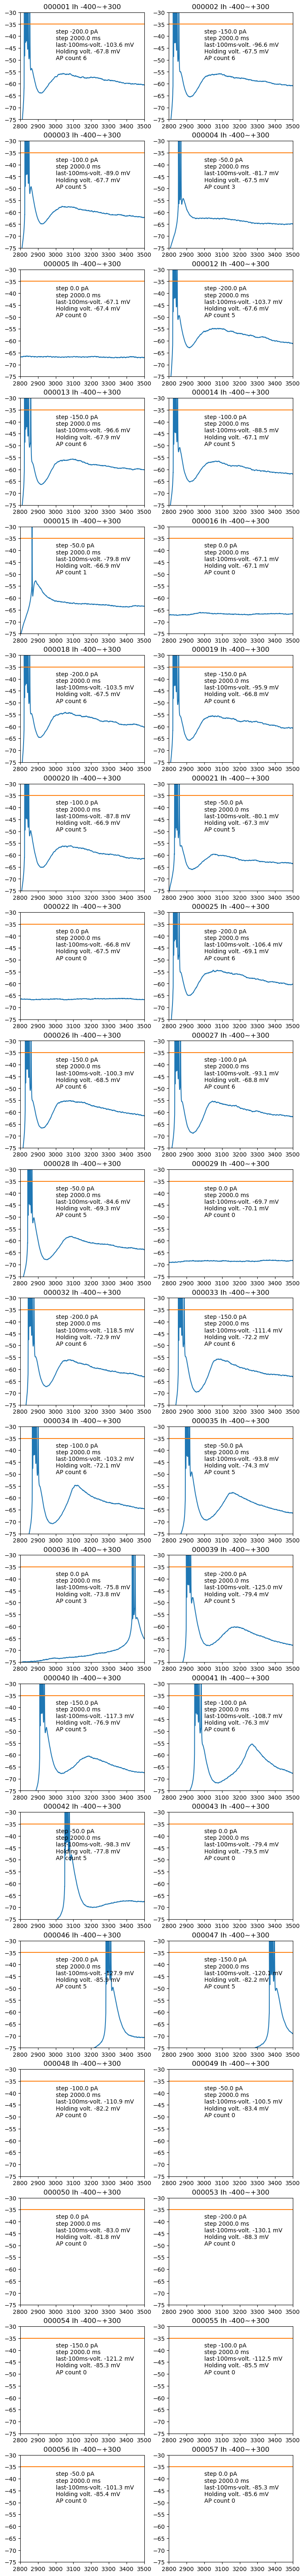



2018-06-01 Slice1c1 control
dataset/2018-06-01_NS/2018-06-01 Slice1c1 RmIh.hdf5


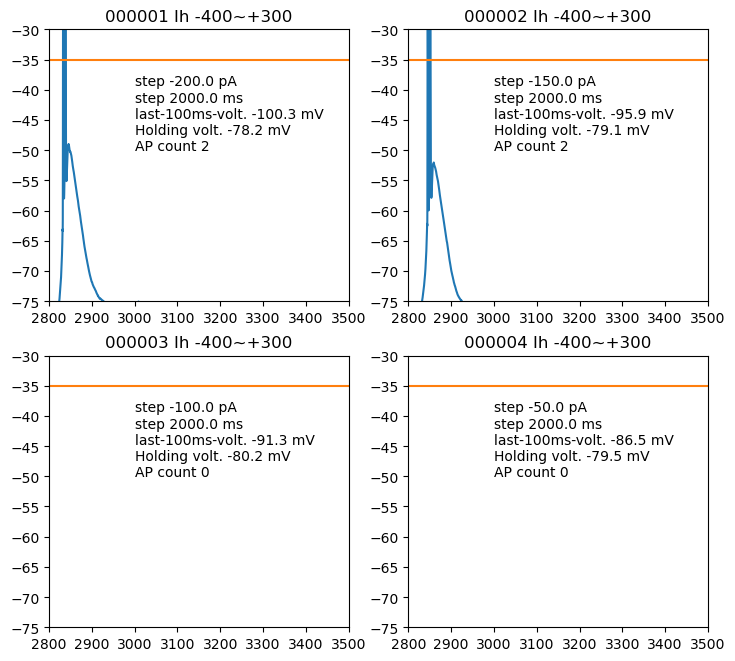



2018-06-06 Slice1c1 control
dataset/2018-06-06_NS/2018-06-06 Slice1c1 RmIh.hdf5


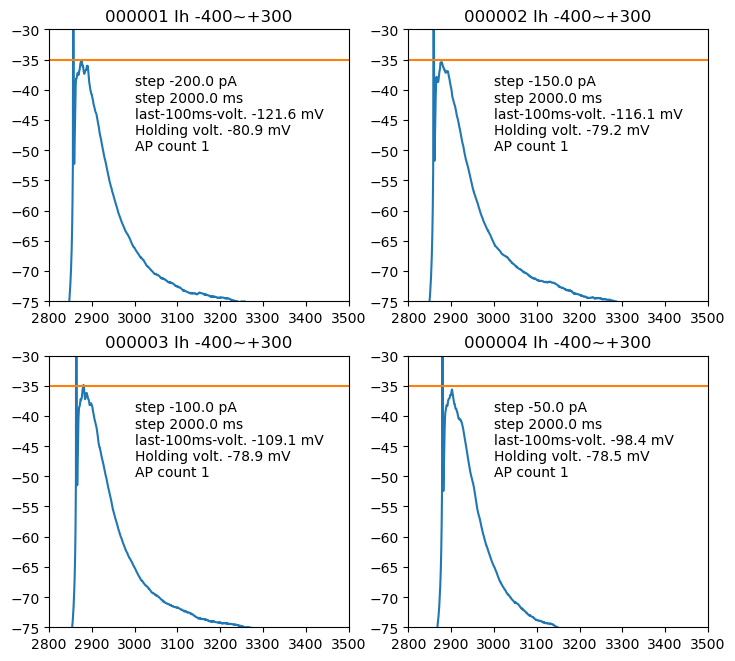

dataset/2018-06-06_NS/2018-06-06 Slice1c1 RmIh_2.hdf5


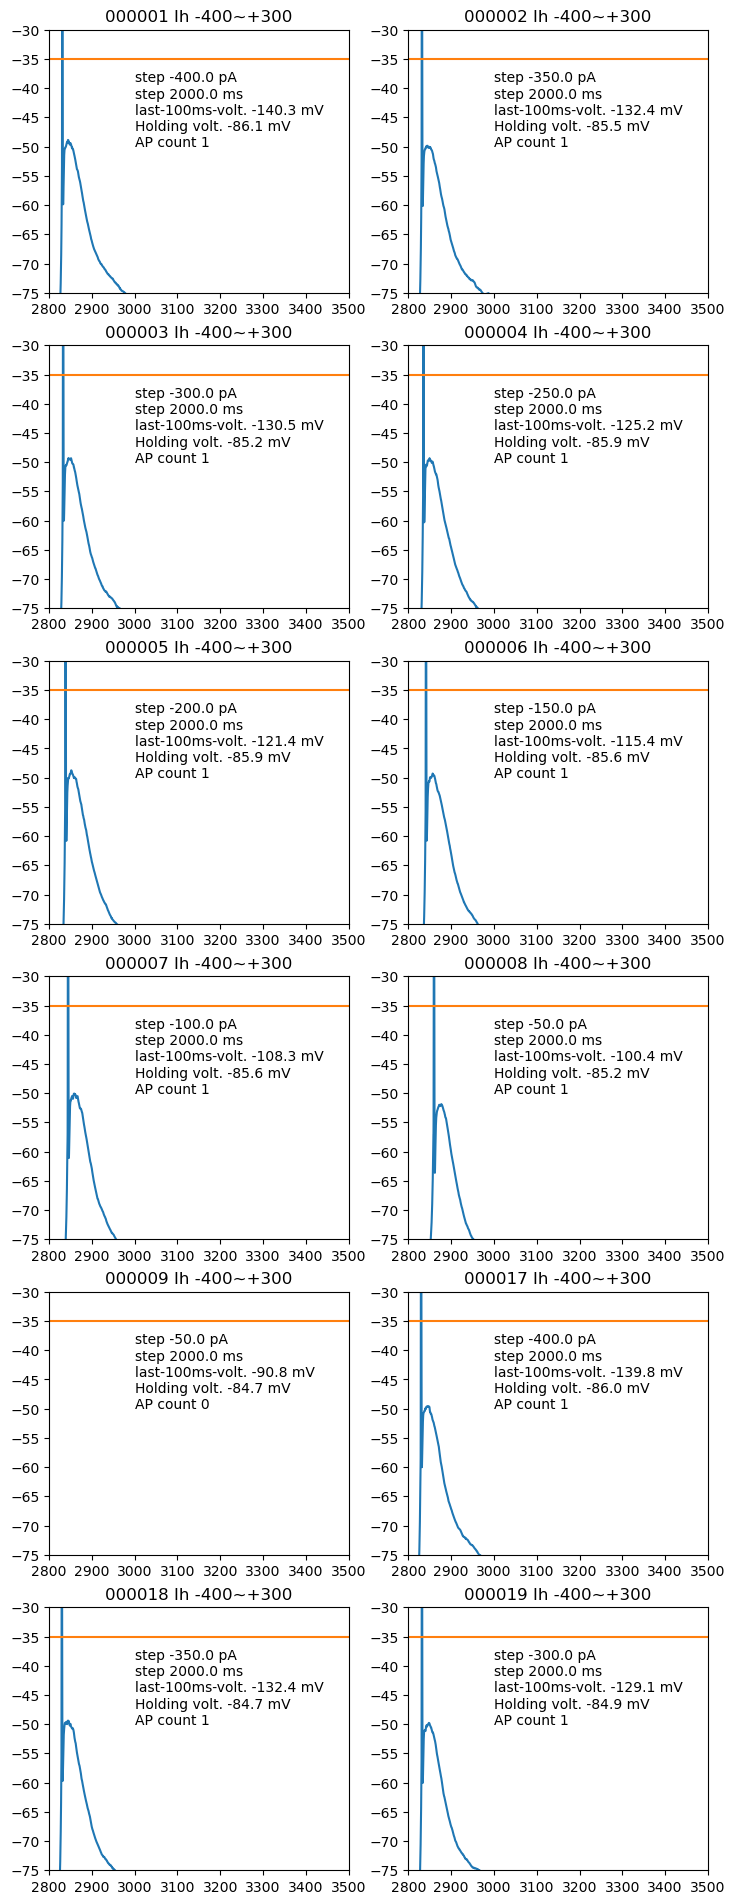



2018-06-06 Slice2c1 control
dataset/2018-06-06_NS/2018-06-06 Slice2c1 RmIh.hdf5


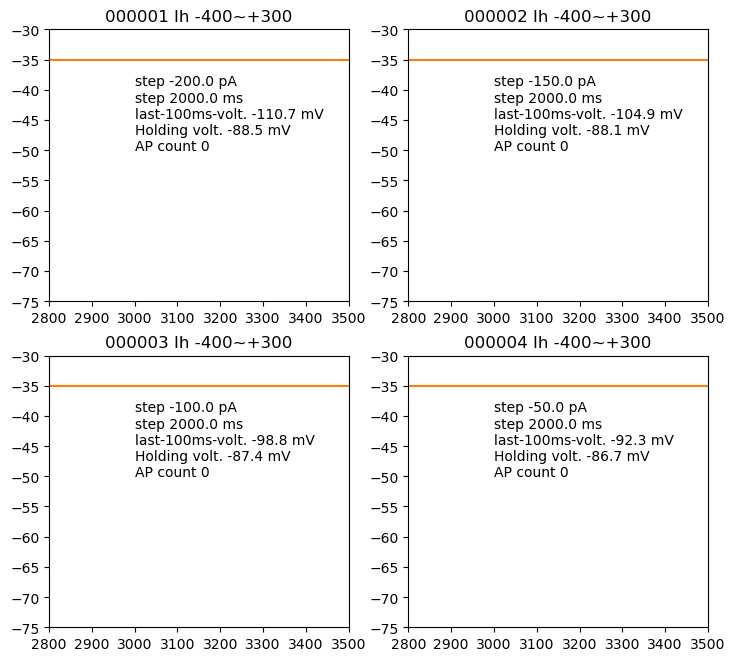

dataset/2018-06-06_NS/2018-06-06 Slice2c1 RmIh_2.hdf5


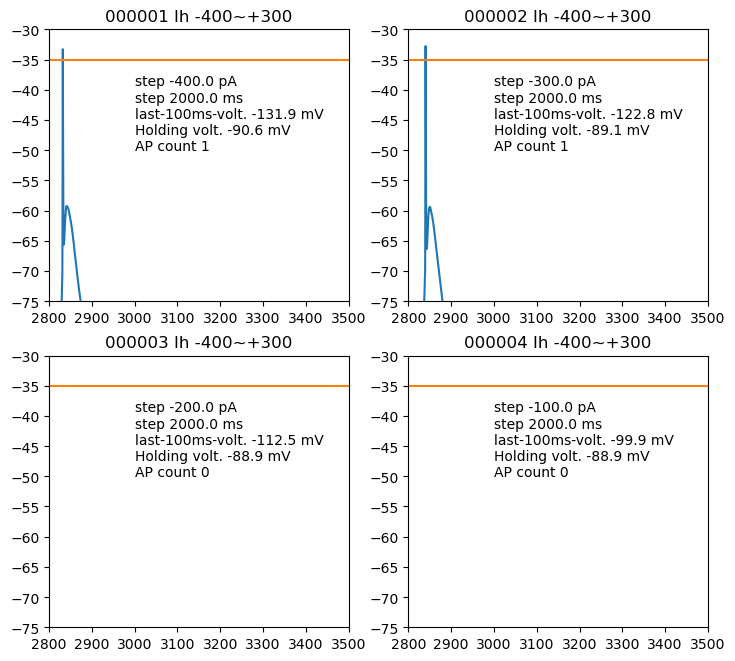



2018-06-22 Slice1c5 control
dataset/2018-06-22_NS/2018-06-22 Slice1c5 RmIh.hdf5


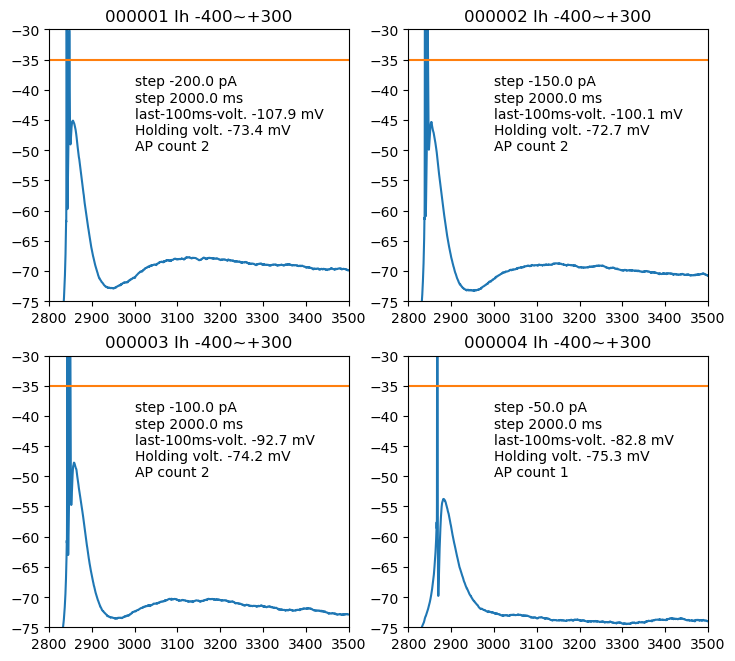

dataset/2018-06-22_NS/2018-06-22 Slice1c5 RmIh_2.hdf5


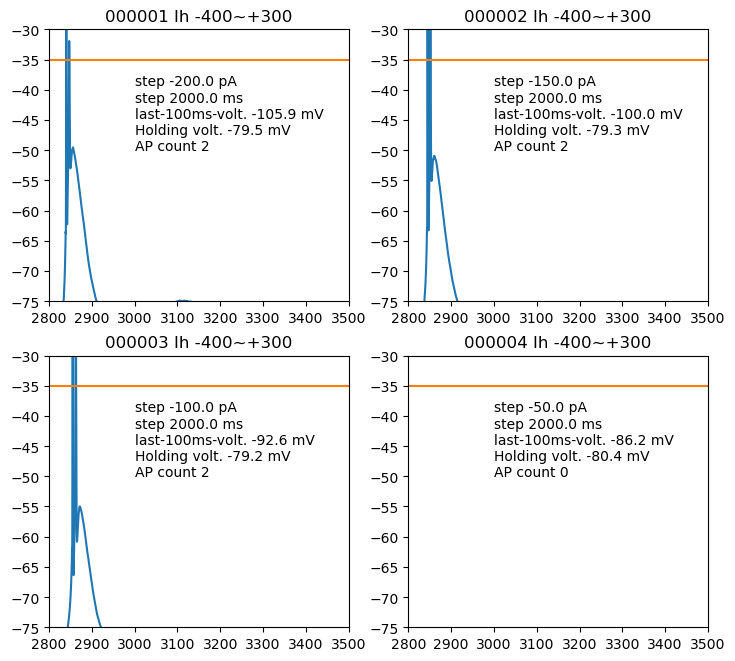

dataset/2018-06-22_NS/2018-06-22 Slice1c5 RmIh_3.hdf5


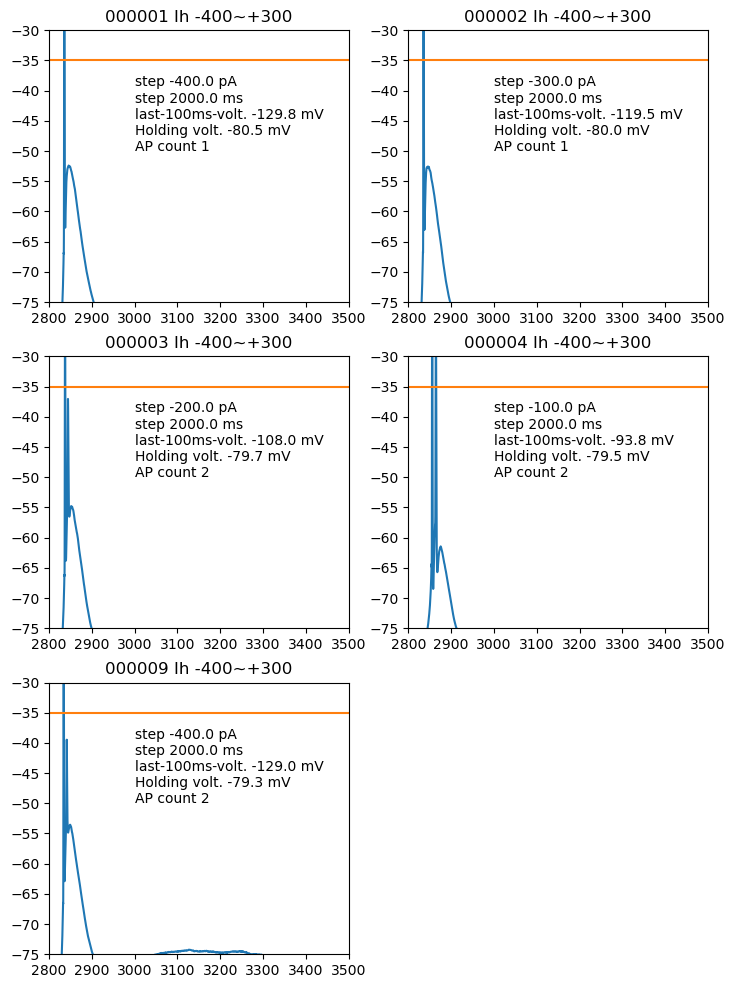

dataset/2018-06-22_NS/2018-06-22 Slice1c5 Tburst.hdf5


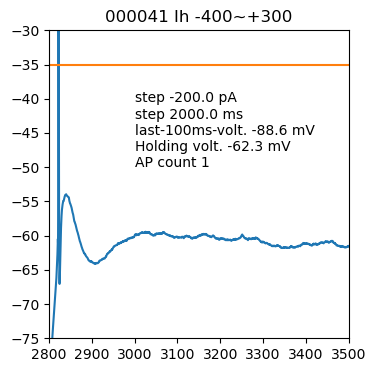

dataset/2018-06-22_NS/2018-06-22 Slice1c5 fI_2.hdf5


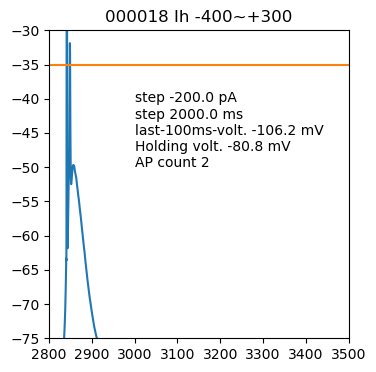



2018-06-22 Slice2c1 control
dataset/2018-06-22_NS/2018-06-22 Slice2c1 RmIh.hdf5


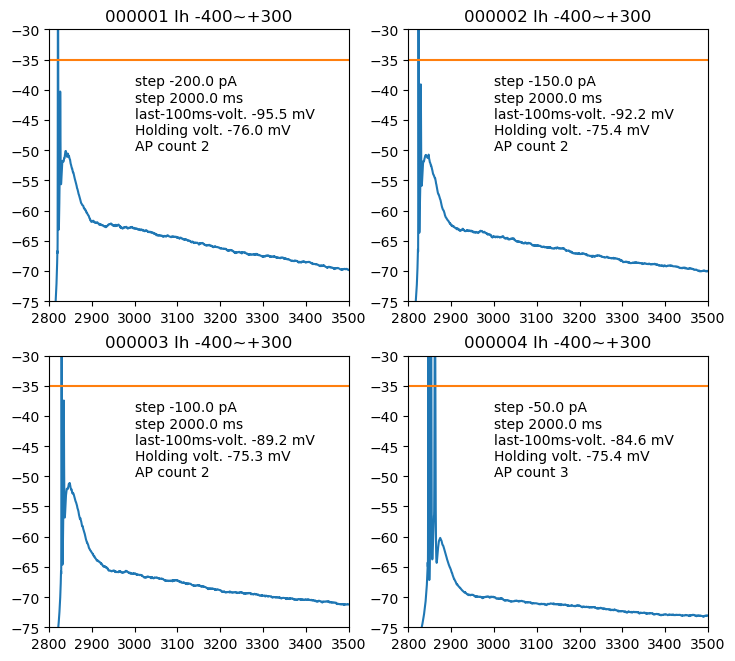



2018-06-22 Slice3c2 control
dataset/2018-06-22_NS/2018-06-22 Slice3c2RmIh.hdf5


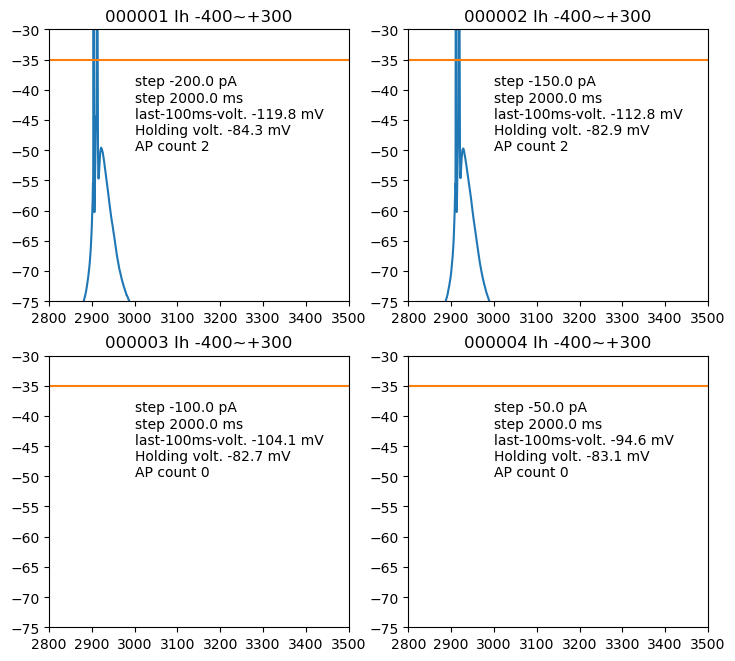



2018-07-16 Slice2c1 control
dataset/2018-07-16_NS/2018-07-16 Slice2c1 RmIh.hdf5


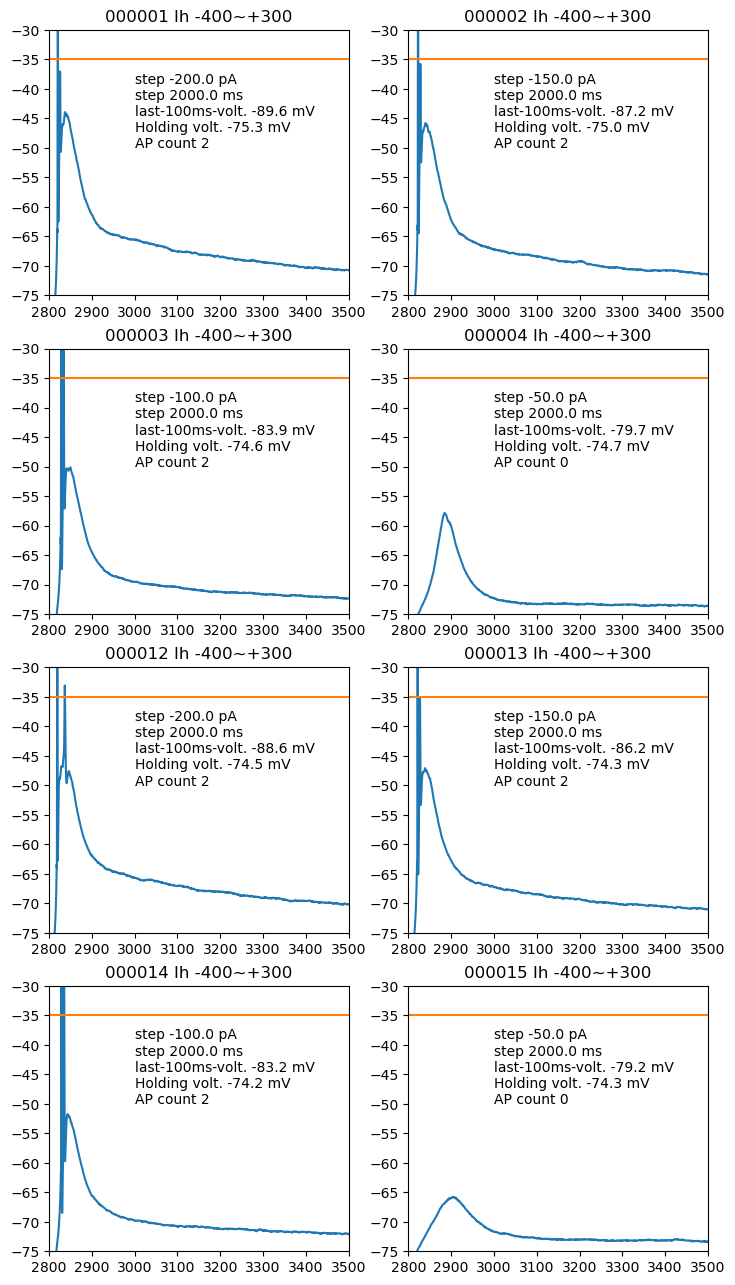



2019-04-09 Slice2c1 control
dataset/2019-04-09_NS/2019-04-09 Slice2c1.hdf5


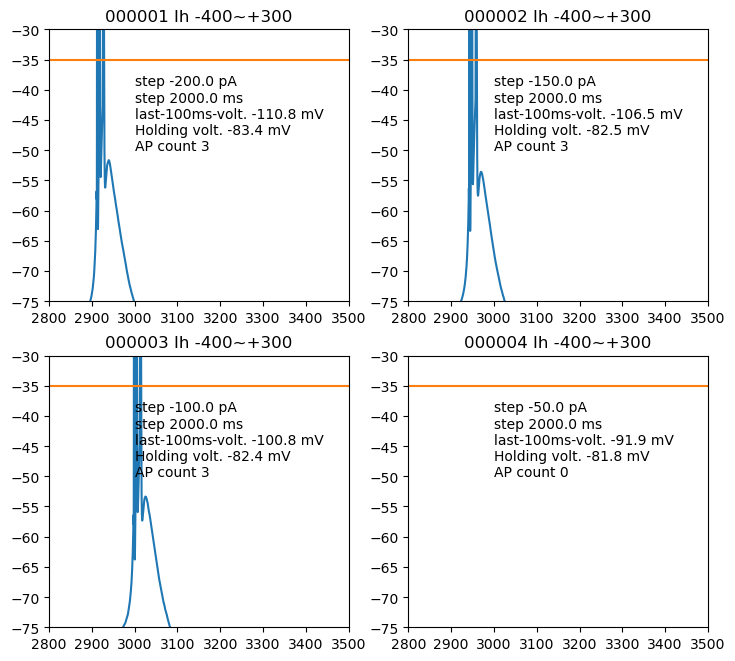



2019-04-15 Slice1c1 control
dataset/2019-04-15_NS/2019-04-15 Slice1c1.hdf5


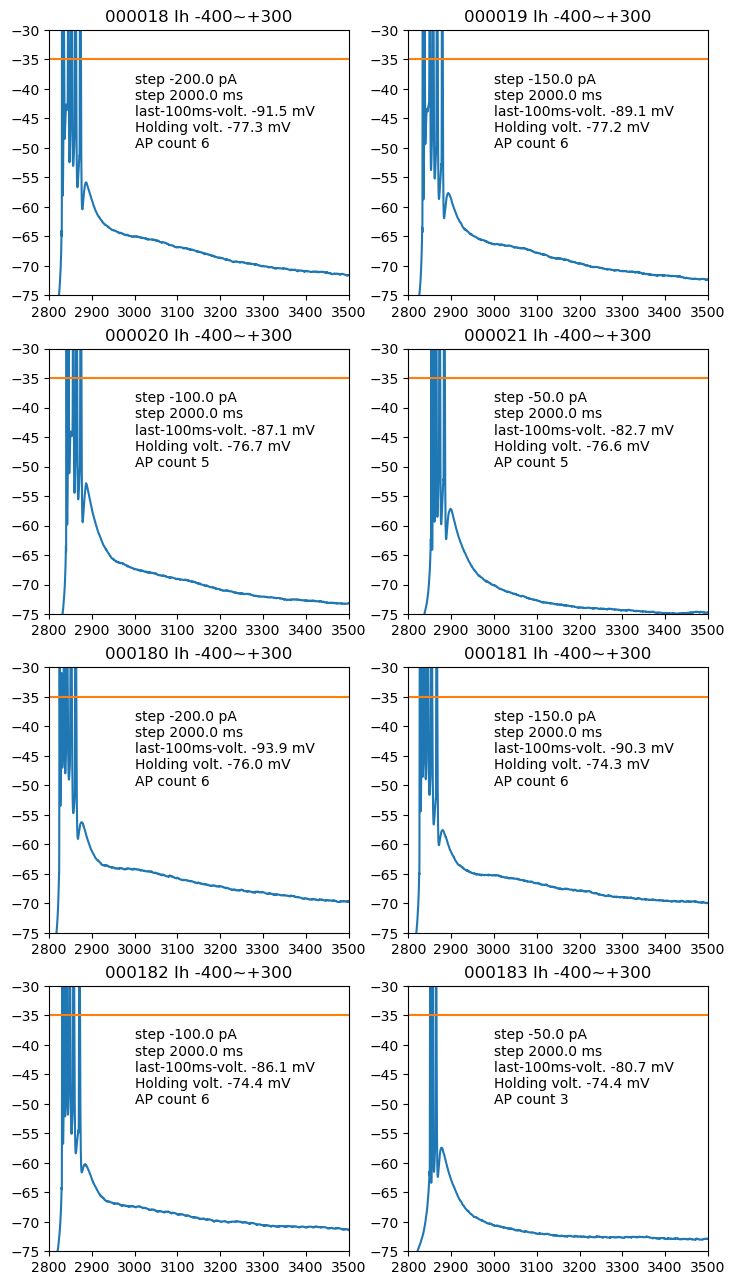



2019-04-15 Slice2c1 control
dataset/2019-04-15_NS/2019-04-15 Slice2c1.hdf5


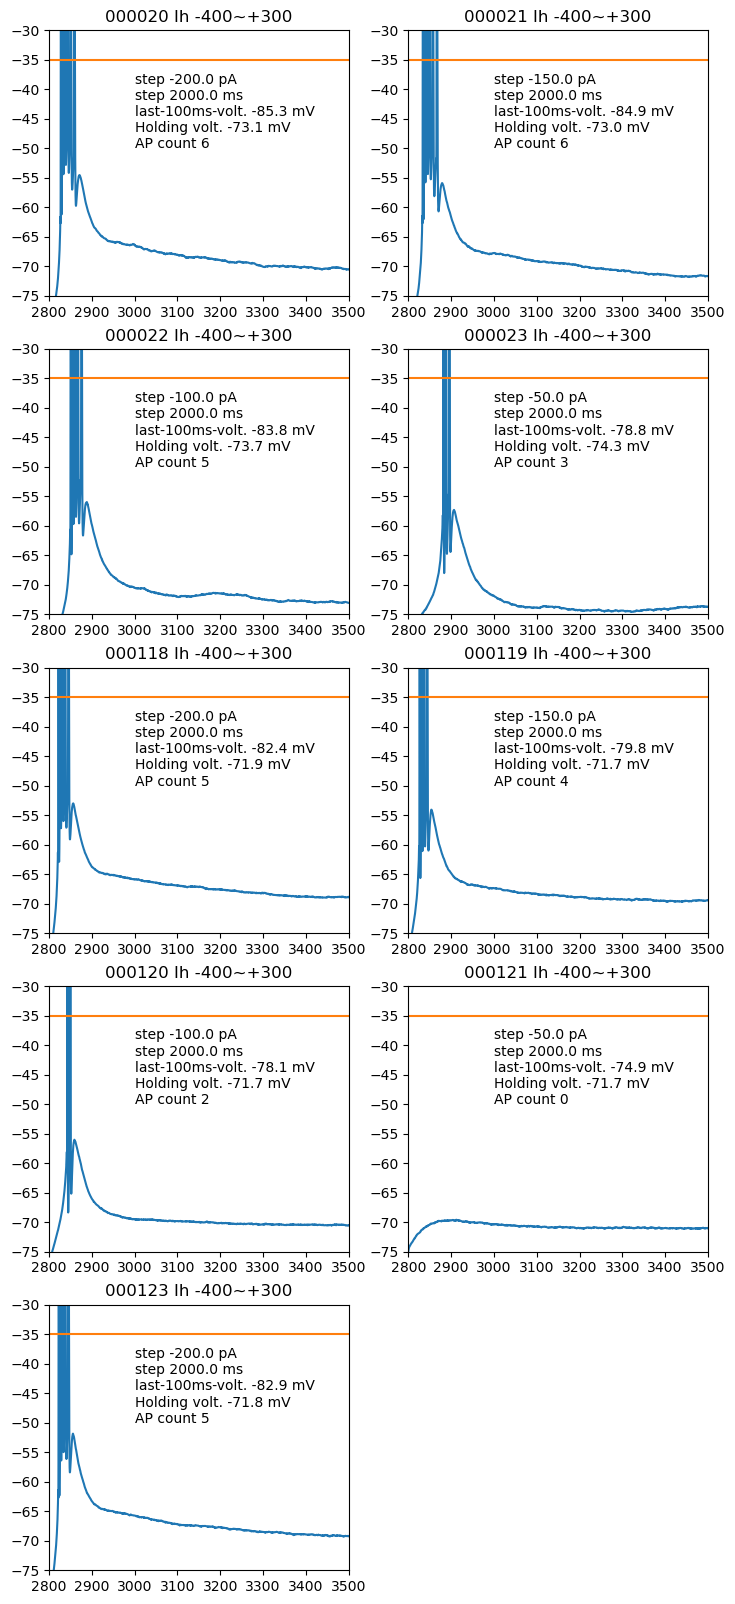



2019-05-09 Slice1c1 control
dataset/2019-05-09_NS/2019-05-09 Slice1c1.hdf5


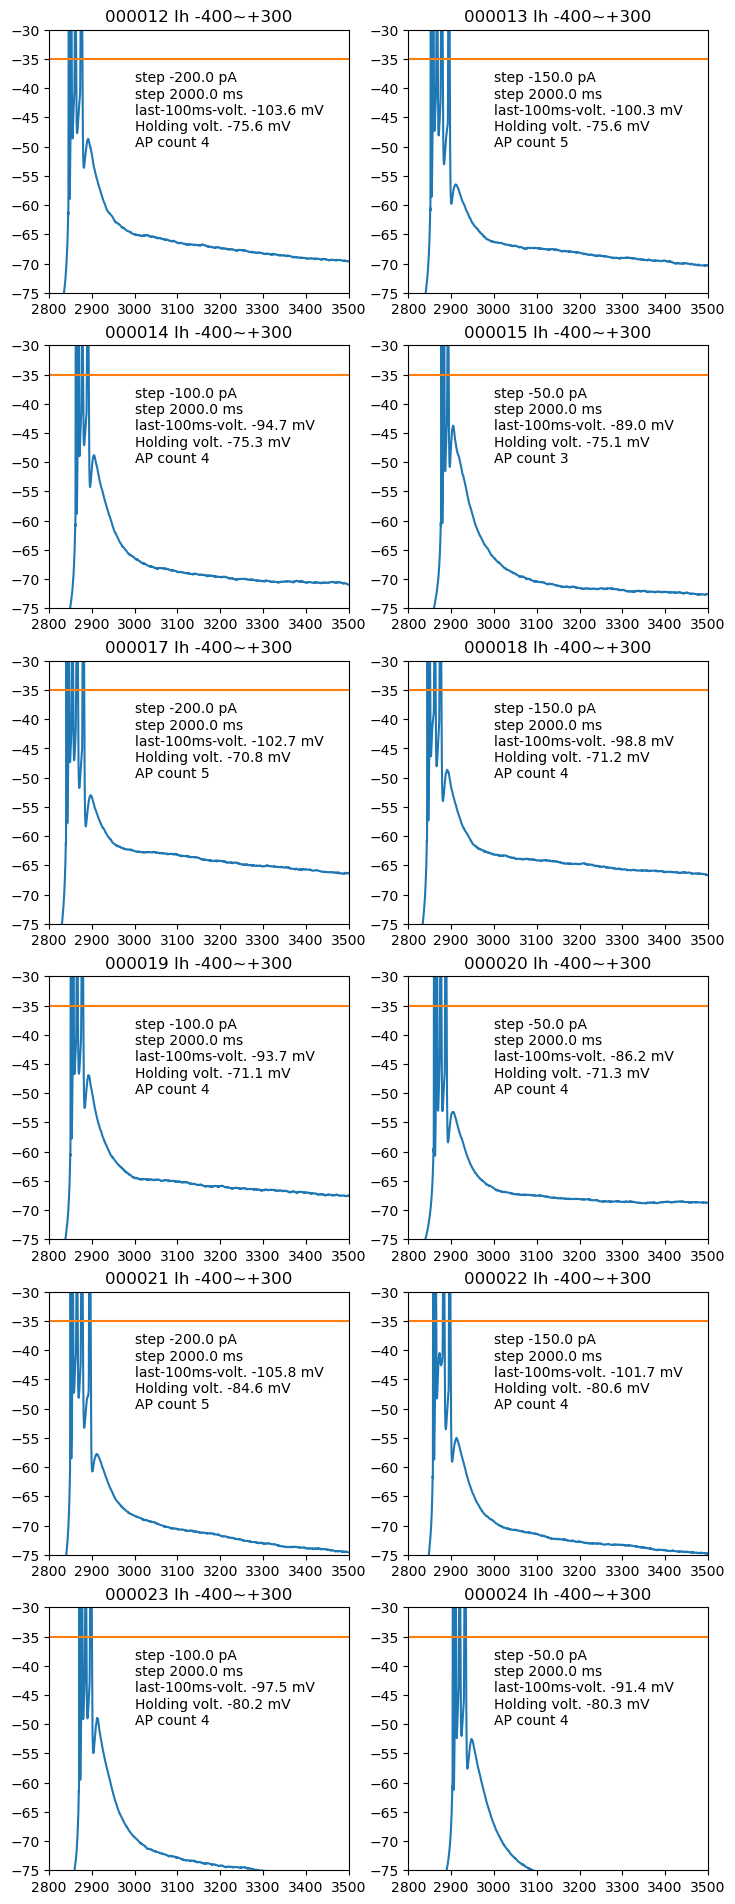

In [12]:
print_traces(data_sag_2s[data_sag_2s['state'] == 'control'])

2018-01-05 Slice1c2 6ohda
dataset/2018-01-05_NS/2018-01-05 Slice1c2RmIh.hdf5


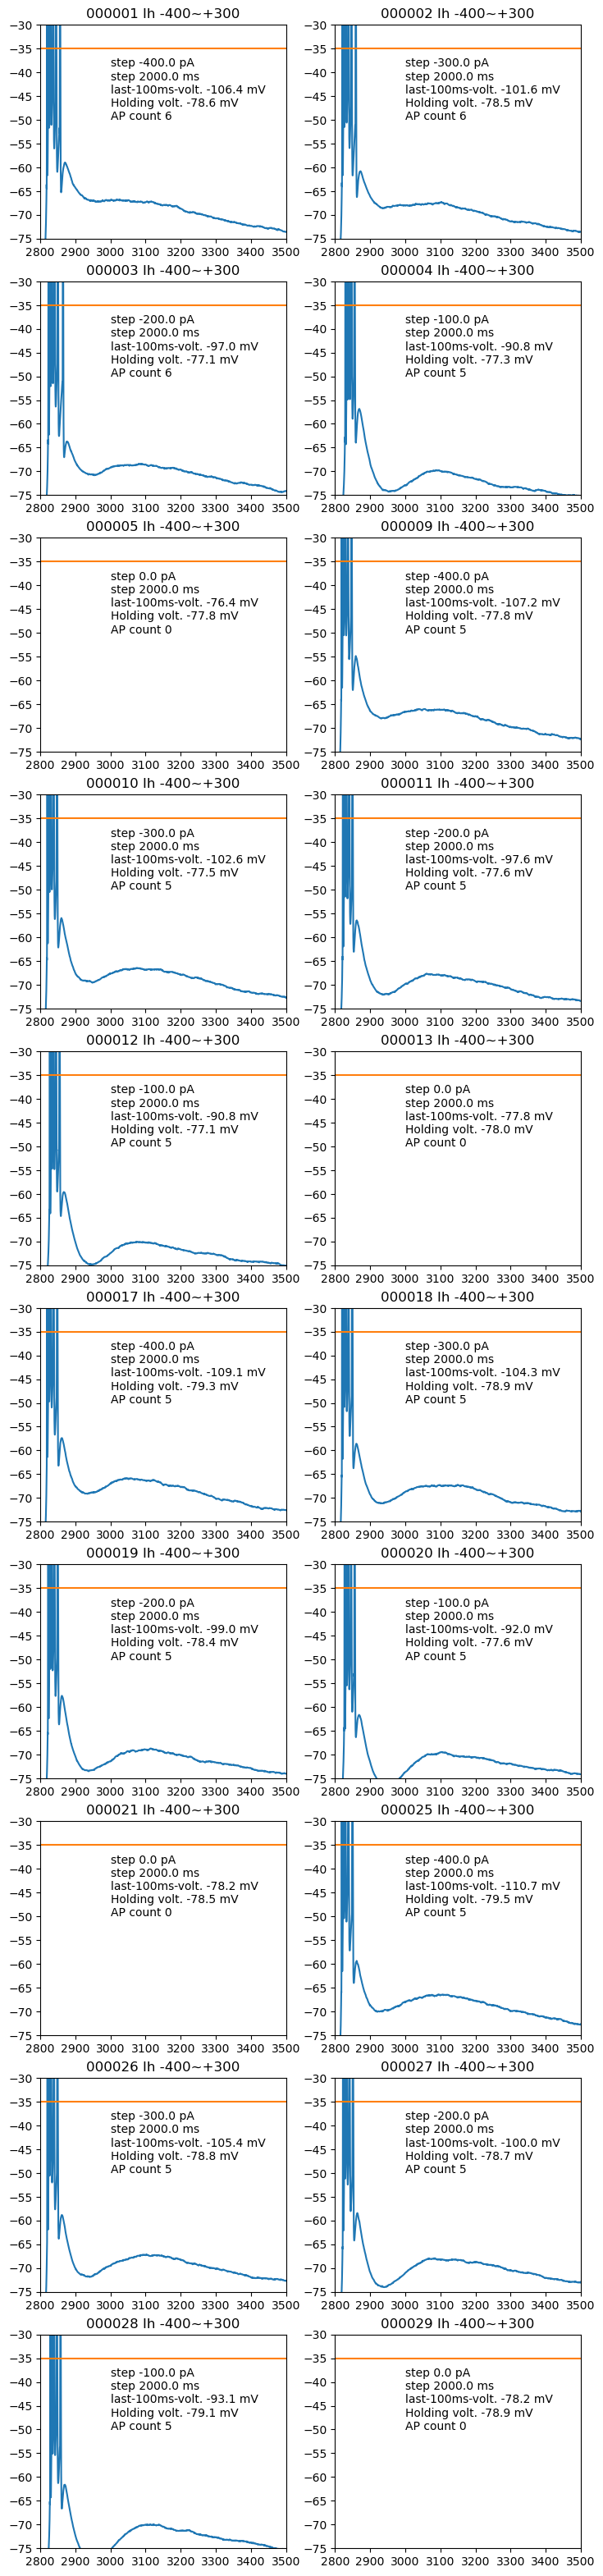



2018-03-30 Slice1c2 6ohda
dataset/2018-03-30_NS/2018-03-30 Slice1c2IhRm.hdf5


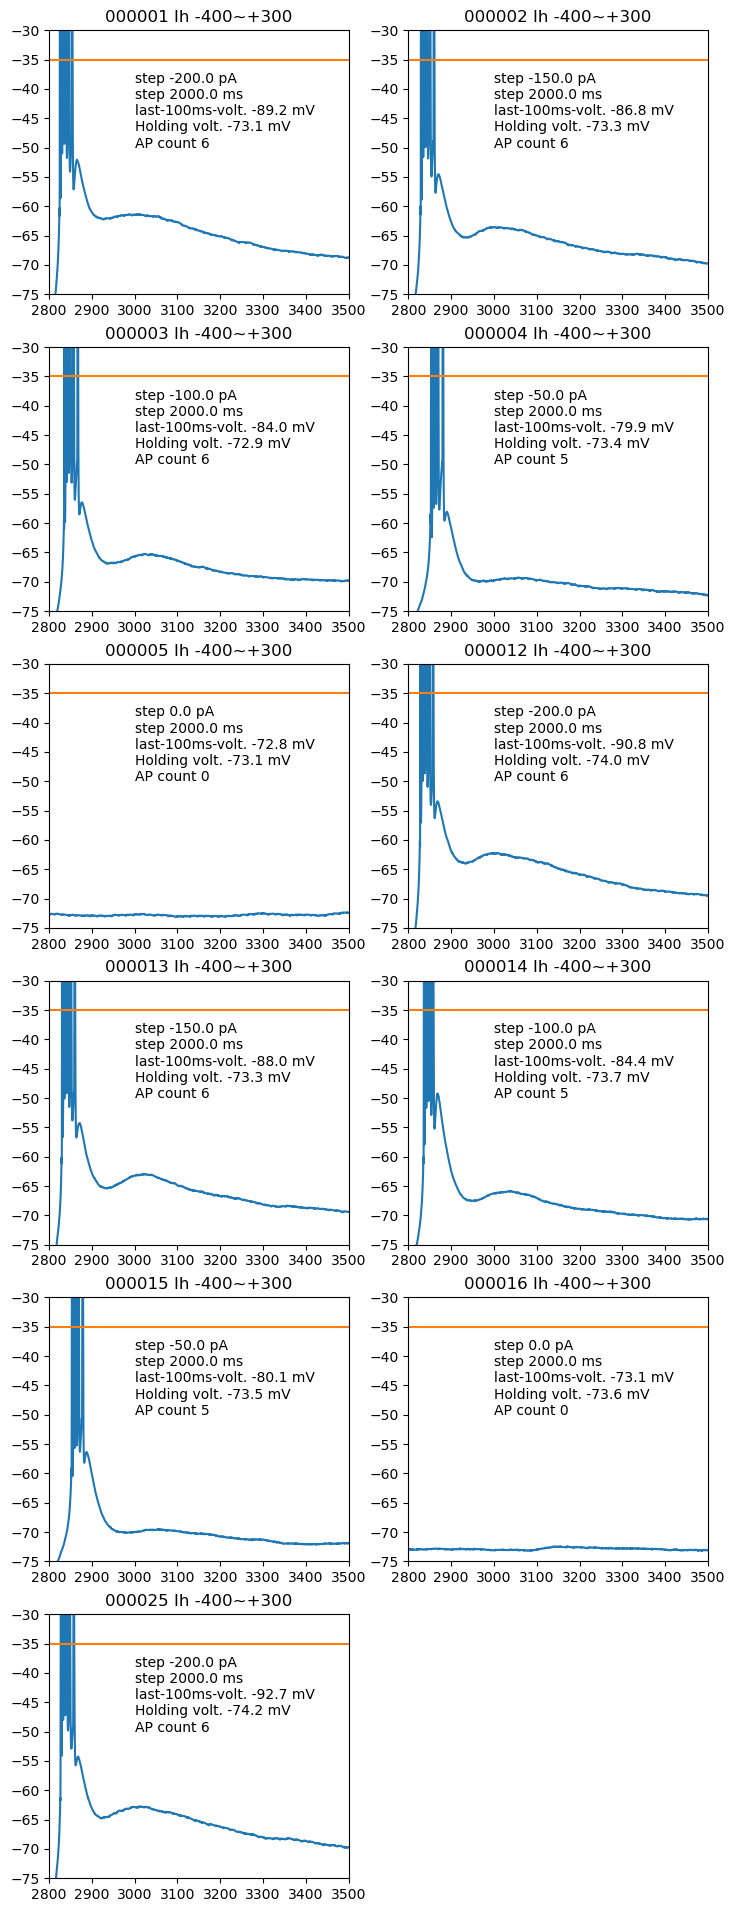



2018-04-04 Slice1c5 6ohda
dataset/2018-04-04_NS/2018-04-04 Slice1c5RmIh.hdf5


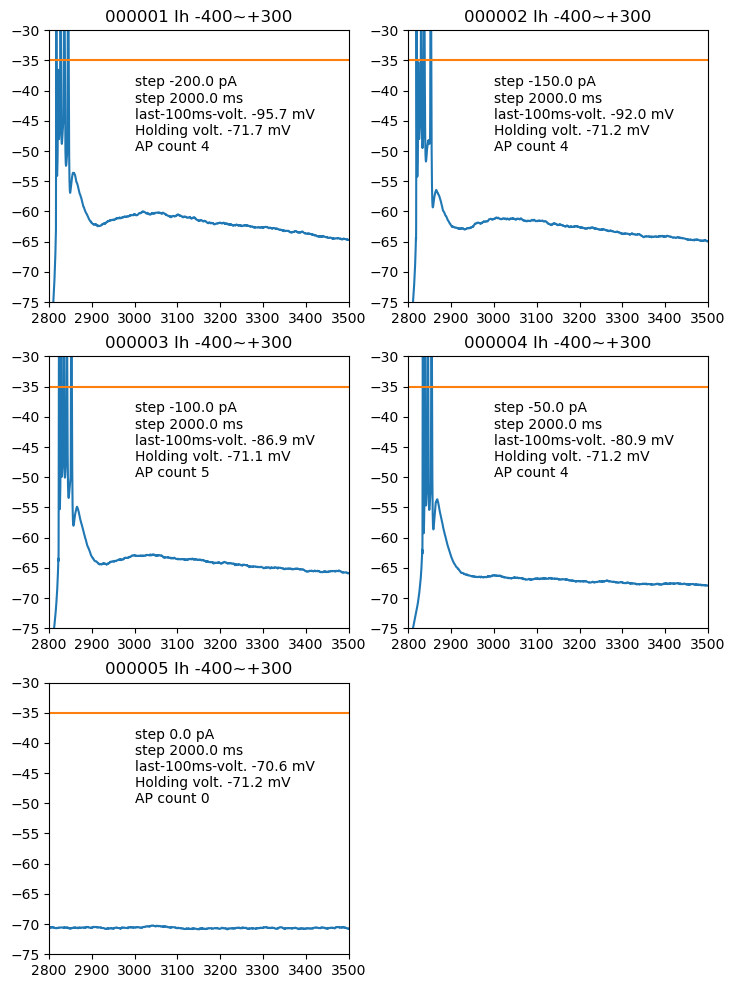



2018-07-18 Slice1c1 6ohda
dataset/2018-07-18_NS/2018-07-18 Slice1c1 RmIh.hdf5


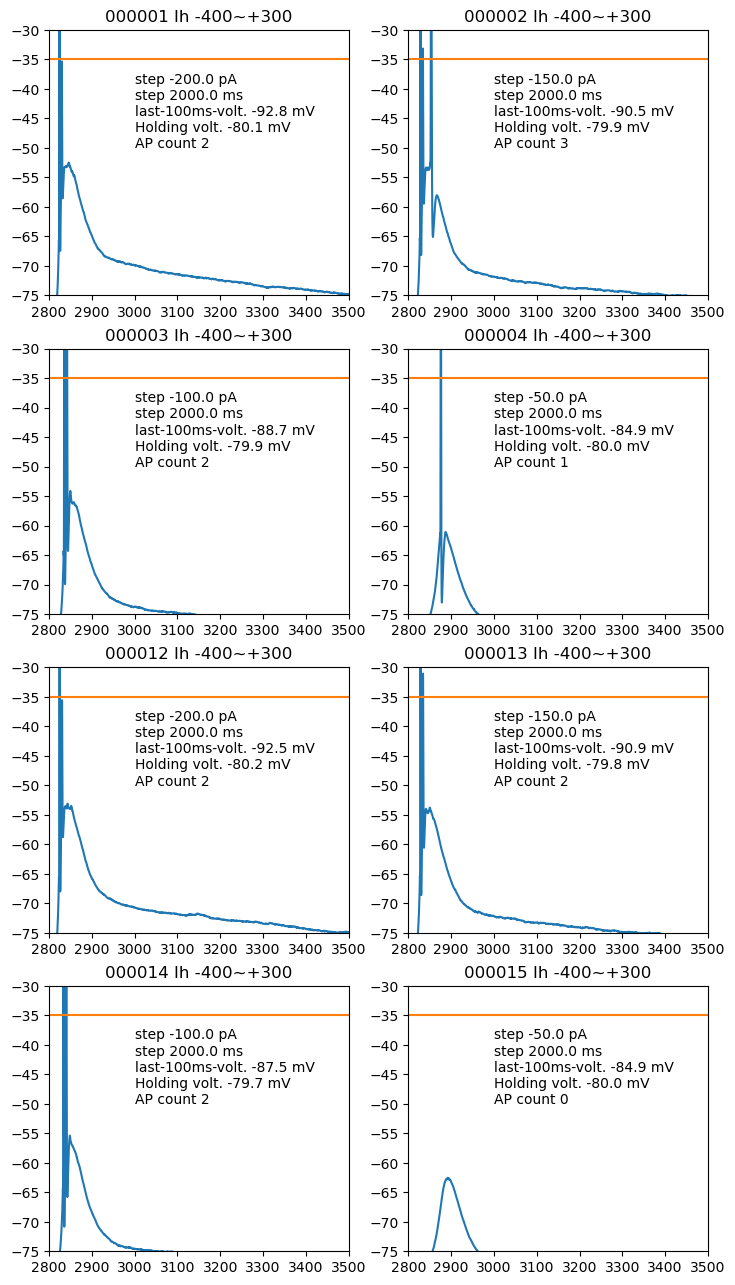



2018-07-18 Slice2c3 6ohda
dataset/2018-07-18_NS/2018-07-18 Slice2c3RmIh.hdf5


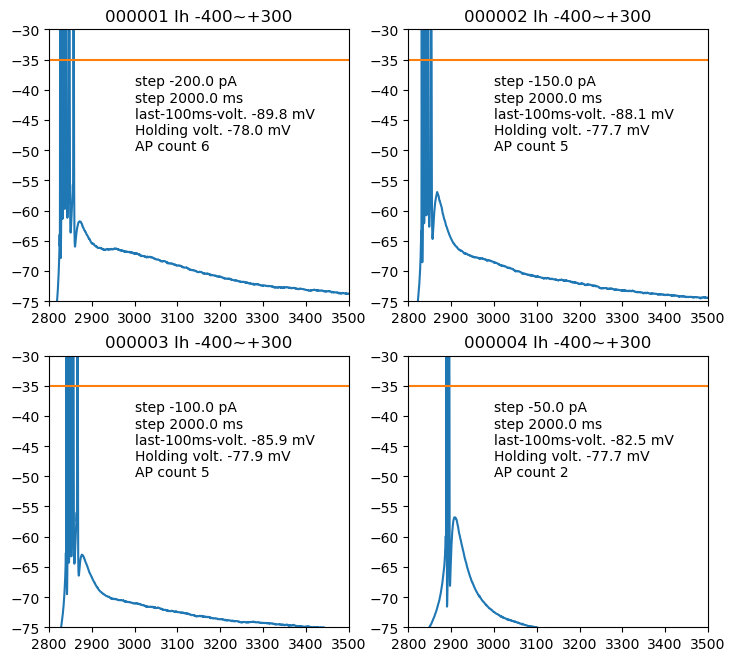



2018-07-25 Slice2c3 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice2c3RmIh.hdf5


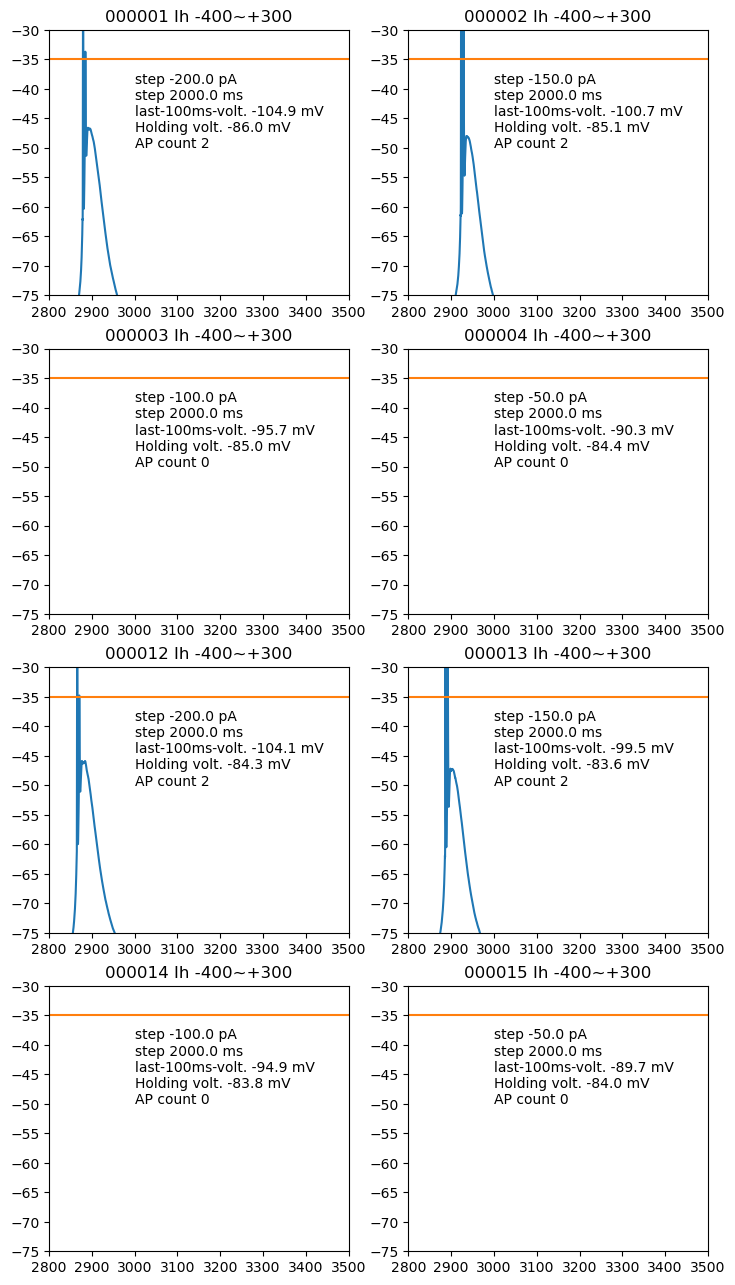



2018-07-25 Slice3c2 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice3c2RmIh.hdf5


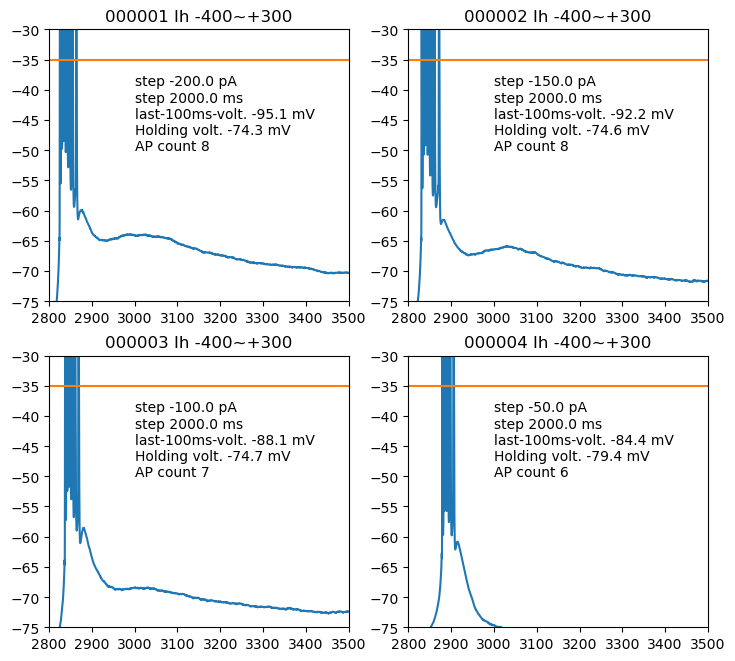



2018-07-25 Slice4c1 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice4c1 RmIh.hdf5


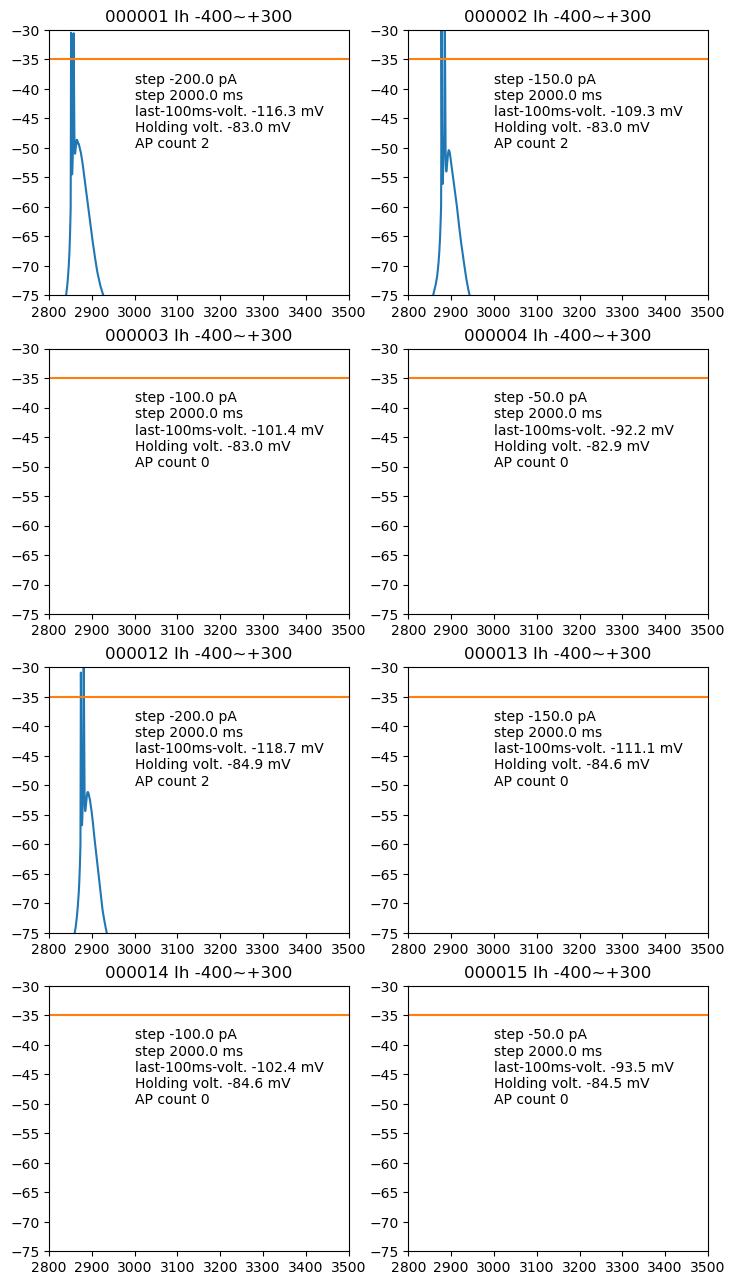



2018-08-03 Slice1c3 6ohda
dataset/2018-08-03_NS/2018-08-03 Slice1c3 Burst.hdf5


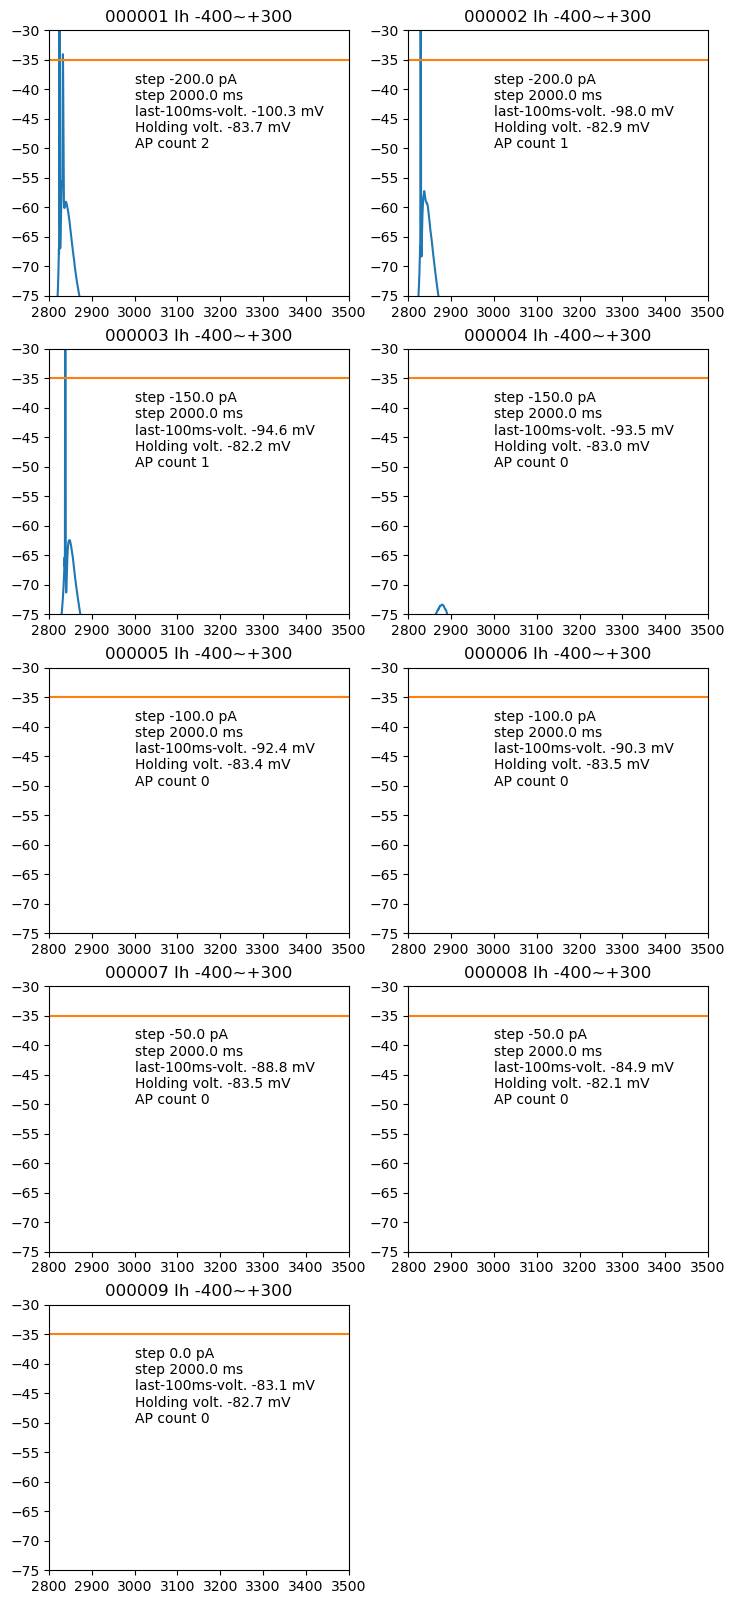



2019-05-10 Slice1c1 6ohda
dataset/2019-05-10_NS/2019-05-10 Slice1c1.hdf5


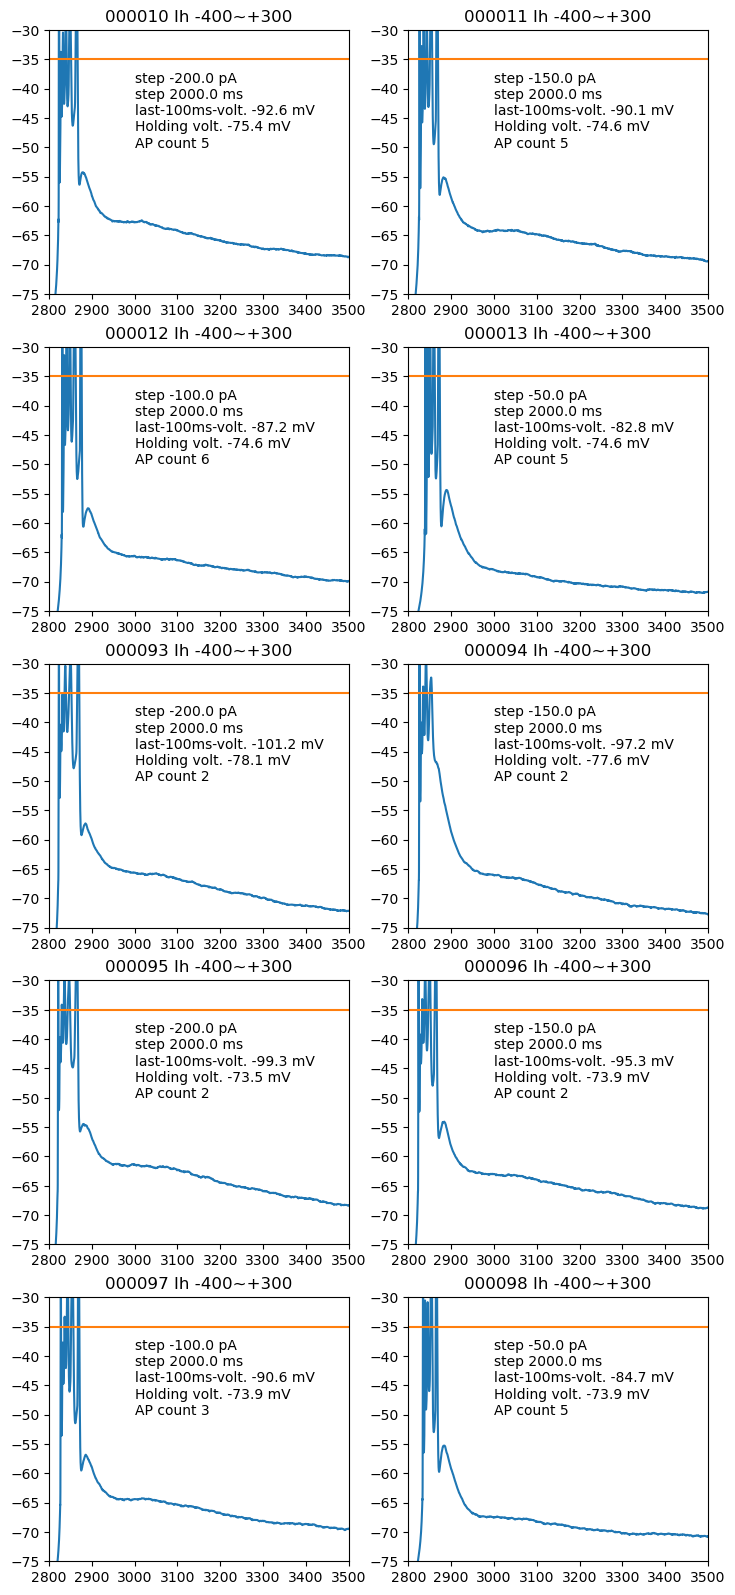

In [13]:
print_traces(data_sag_2s[data_sag_2s['state'] == '6ohda'])

# burst

In [14]:
# show 2s long traces only
data_tburst_2s = data[(data['protocol'] == 'tburst')&(data['stim dur'] == 2000)]

2018-02-21 Slice1c2 control
dataset/2018-02-21_NS/2018-02-21 Slice1c2TBurst.hdf5


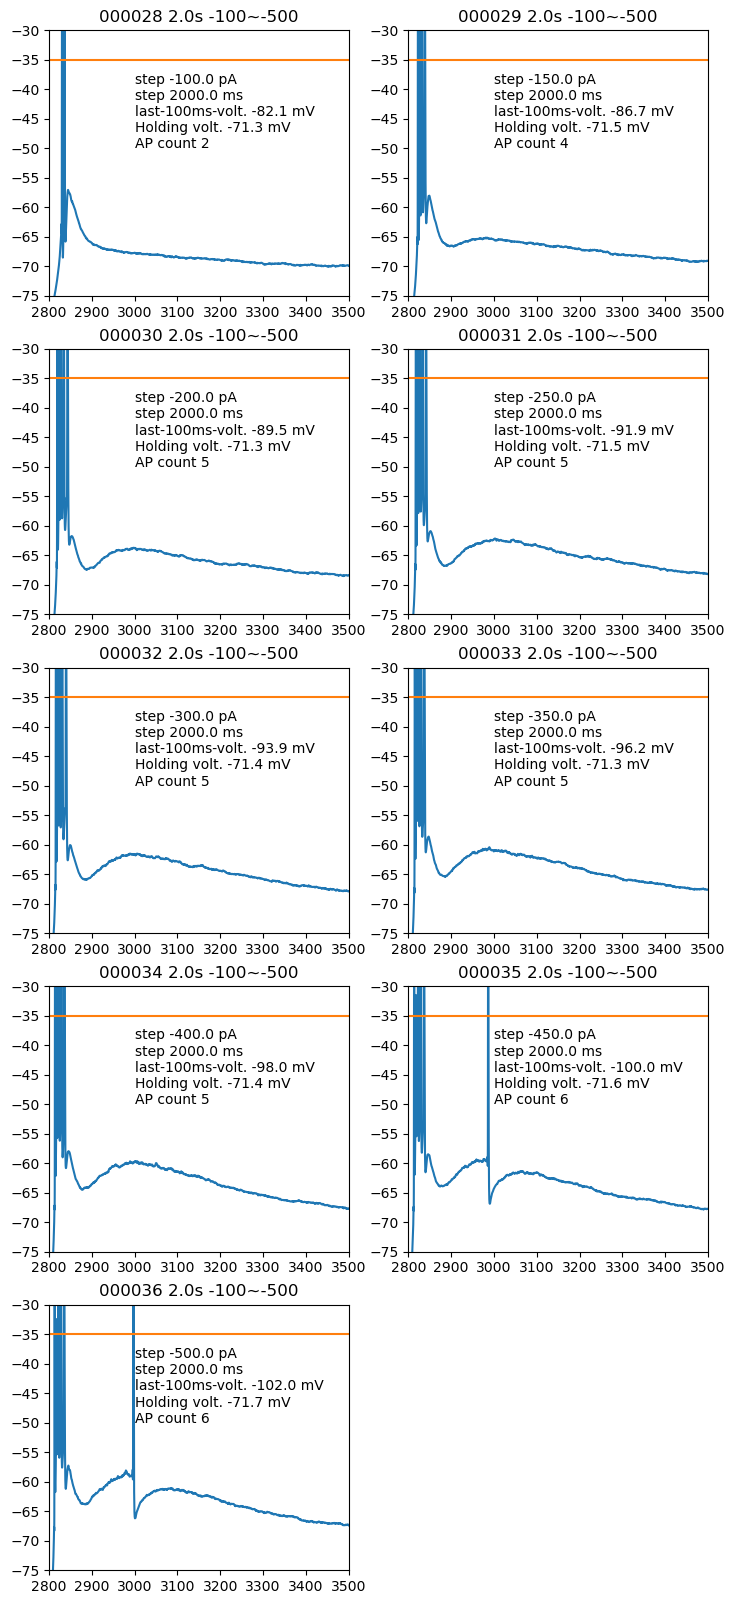



2018-02-21 Slice1c3 control
dataset/2018-02-21_NS/2018-02-21 Slice1c3TBurst.hdf5


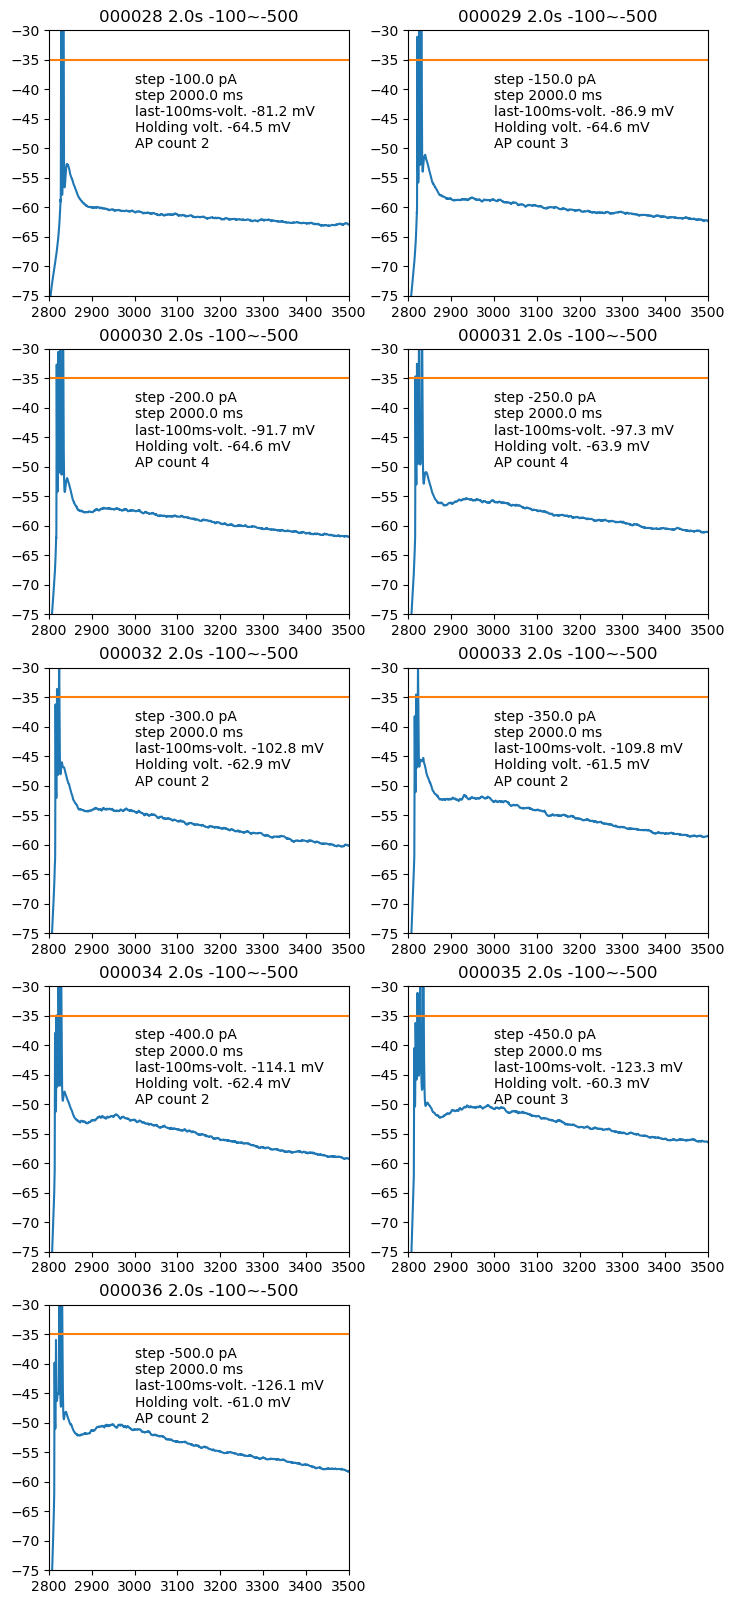



2018-03-21 Slice1c2 control
dataset/2018-03-21_NS/2018-03-21 Slice1c2 TBurst.hdf5


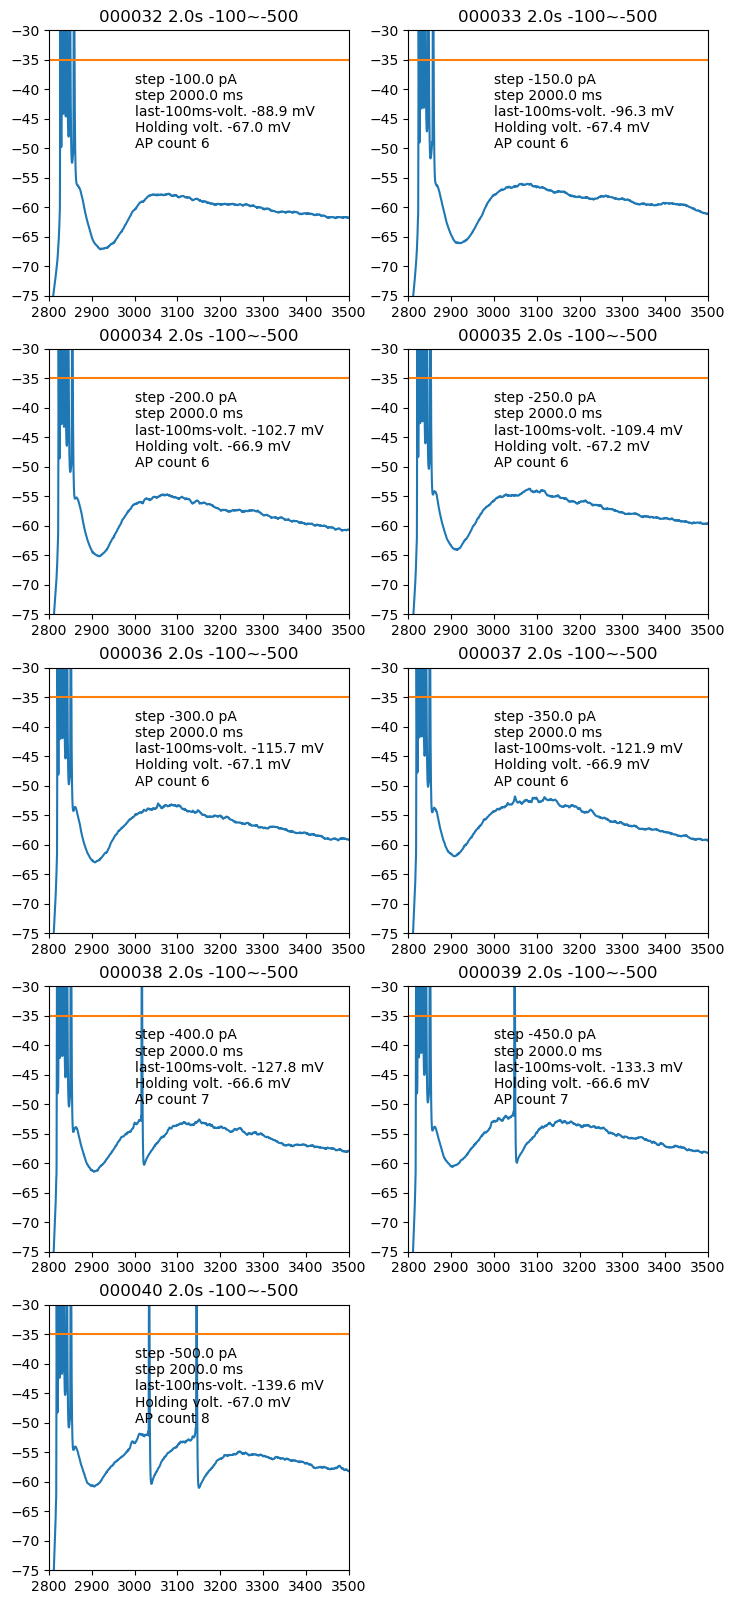



2018-06-01 Slice1c1 control
dataset/2018-06-01_NS/2018-06-01 Slice1c1 TBurst.hdf5


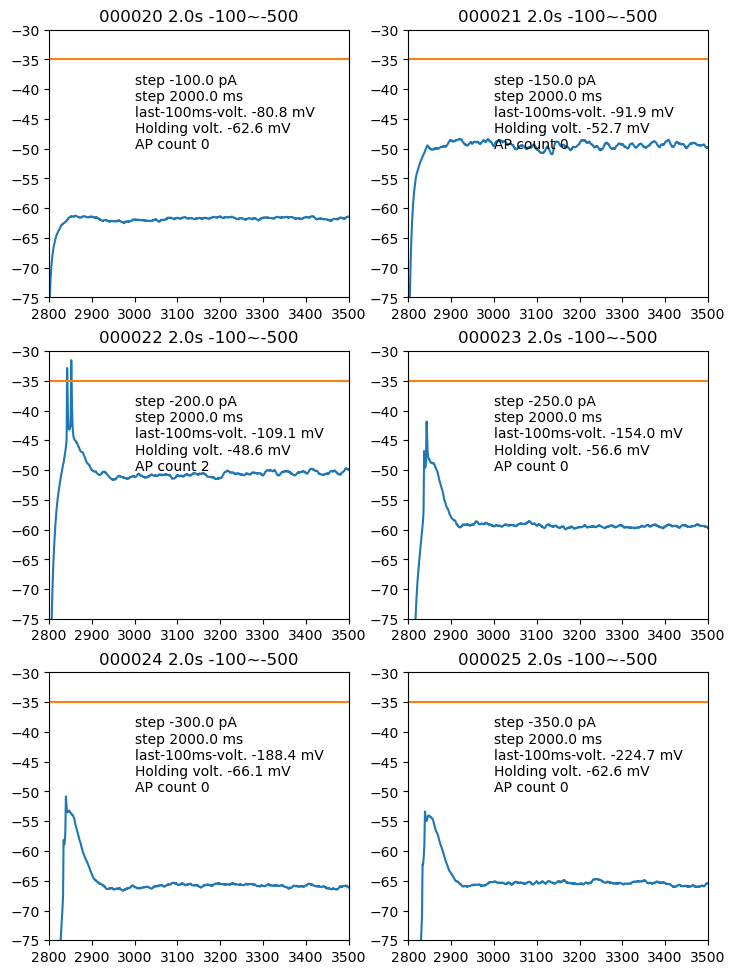



2018-06-06 Slice1c1 control
dataset/2018-06-06_NS/2018-06-06 Slice1c1 TBurst.hdf5


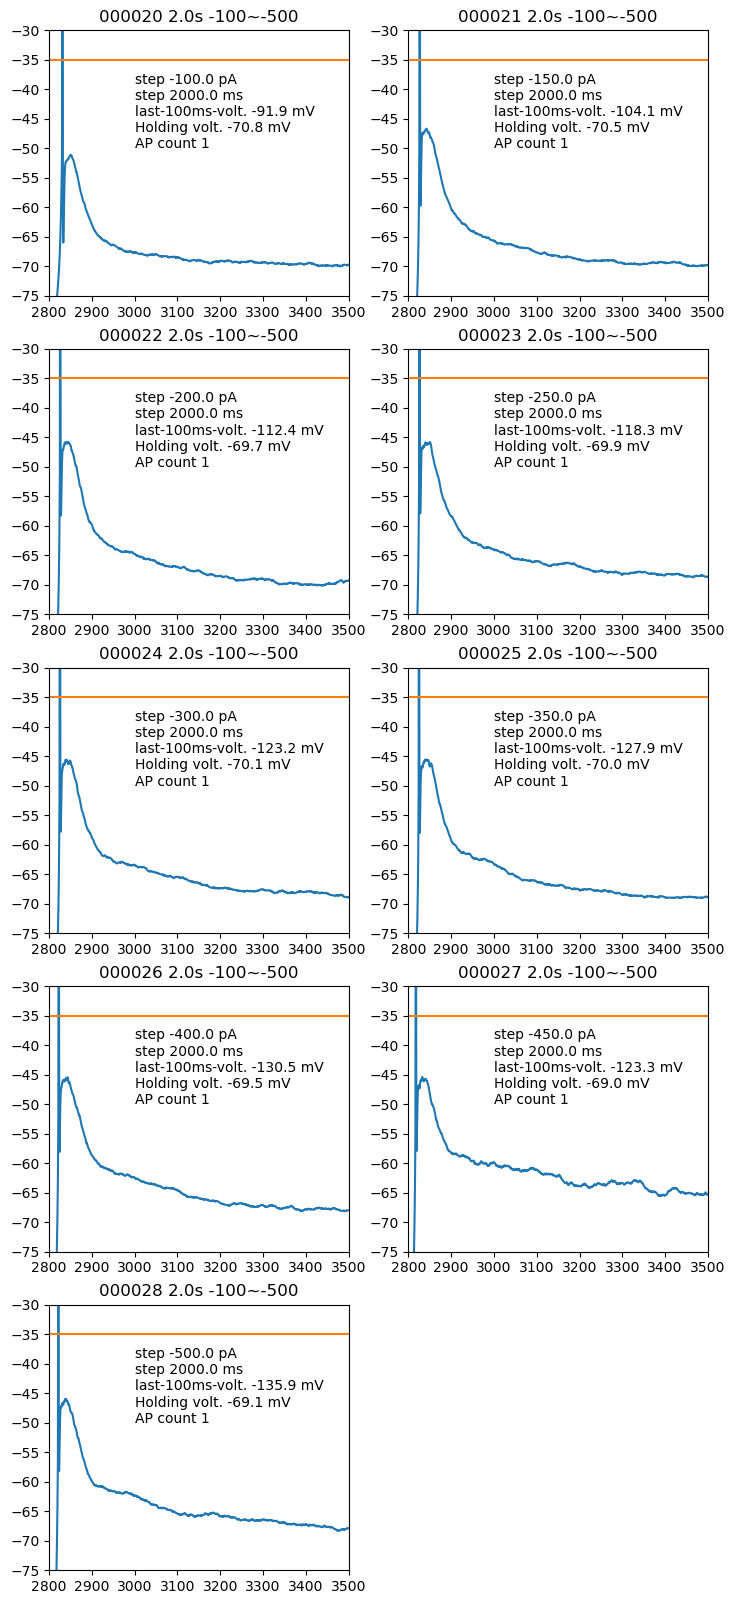



2018-06-06 Slice2c1 control
dataset/2018-06-06_NS/2018-06-06 Slice2c1 TBurst.hdf5


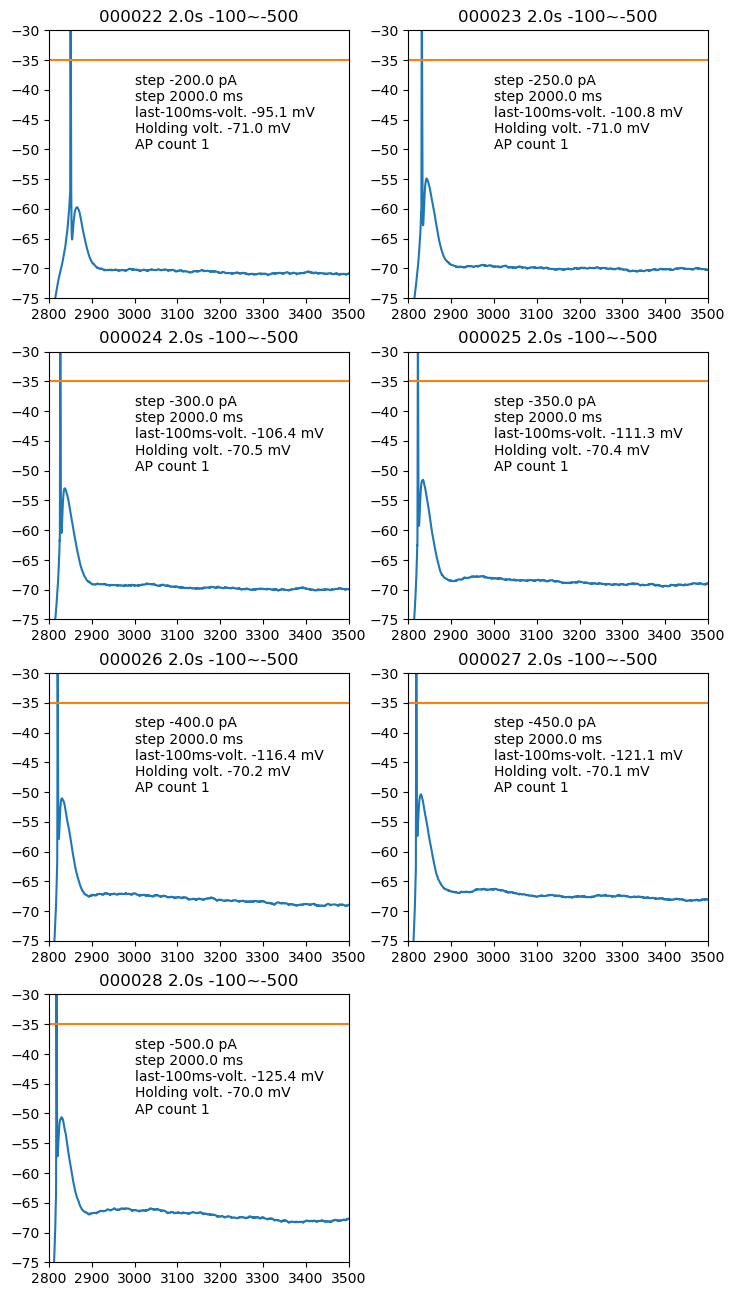



2018-06-22 Slice1c5 control
dataset/2018-06-22_NS/2018-06-22 Slice1c5 Tburst.hdf5


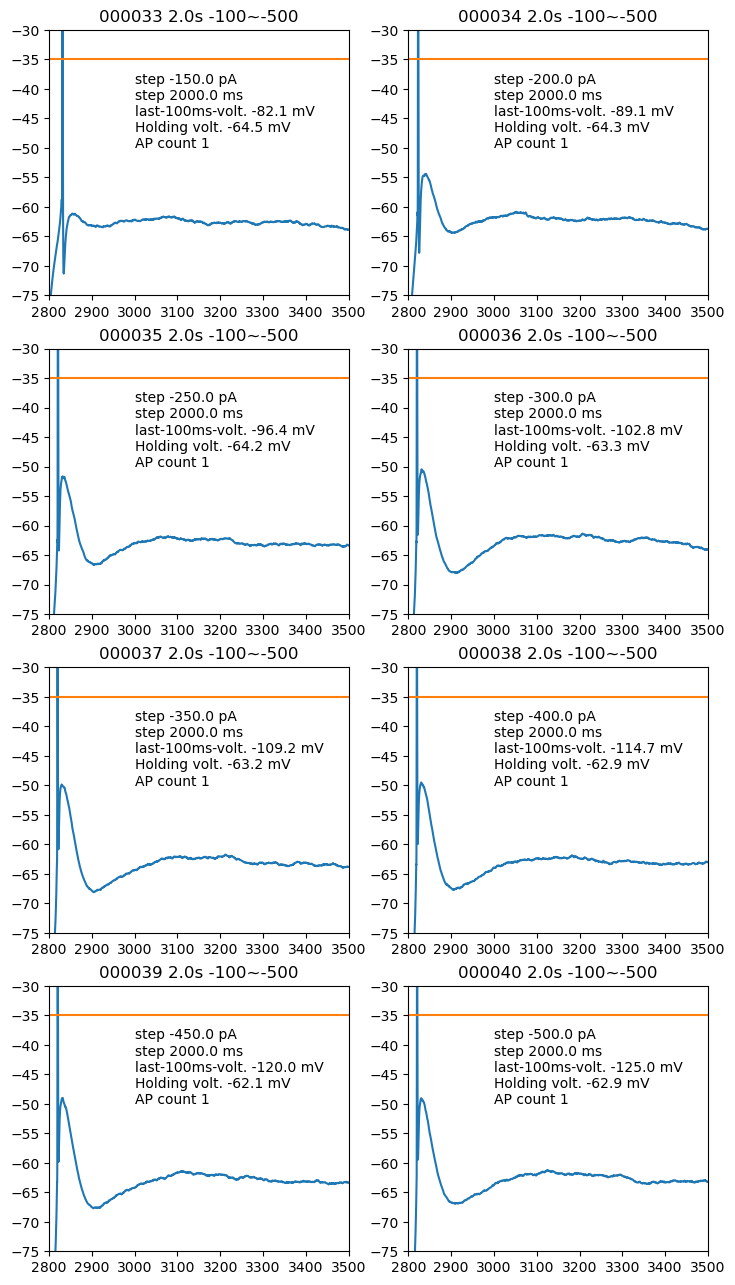



2018-06-22 Slice2c1 control
dataset/2018-06-22_NS/2018-06-22 Slice2c1 TBurst_2.hdf5


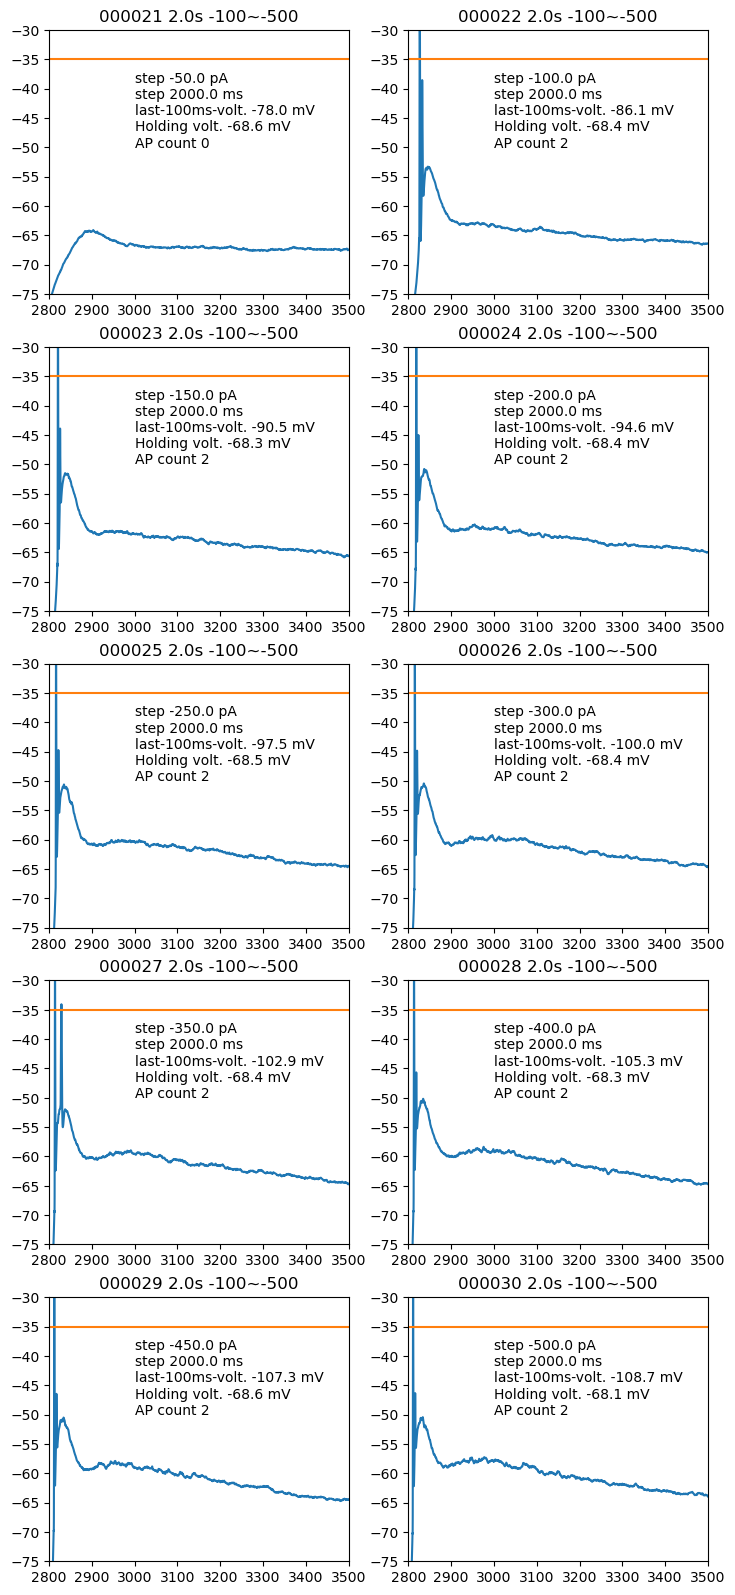



2018-06-22 Slice3c2 control
dataset/2018-06-22_NS/2018-06-22 Slice3c2TBurst.hdf5


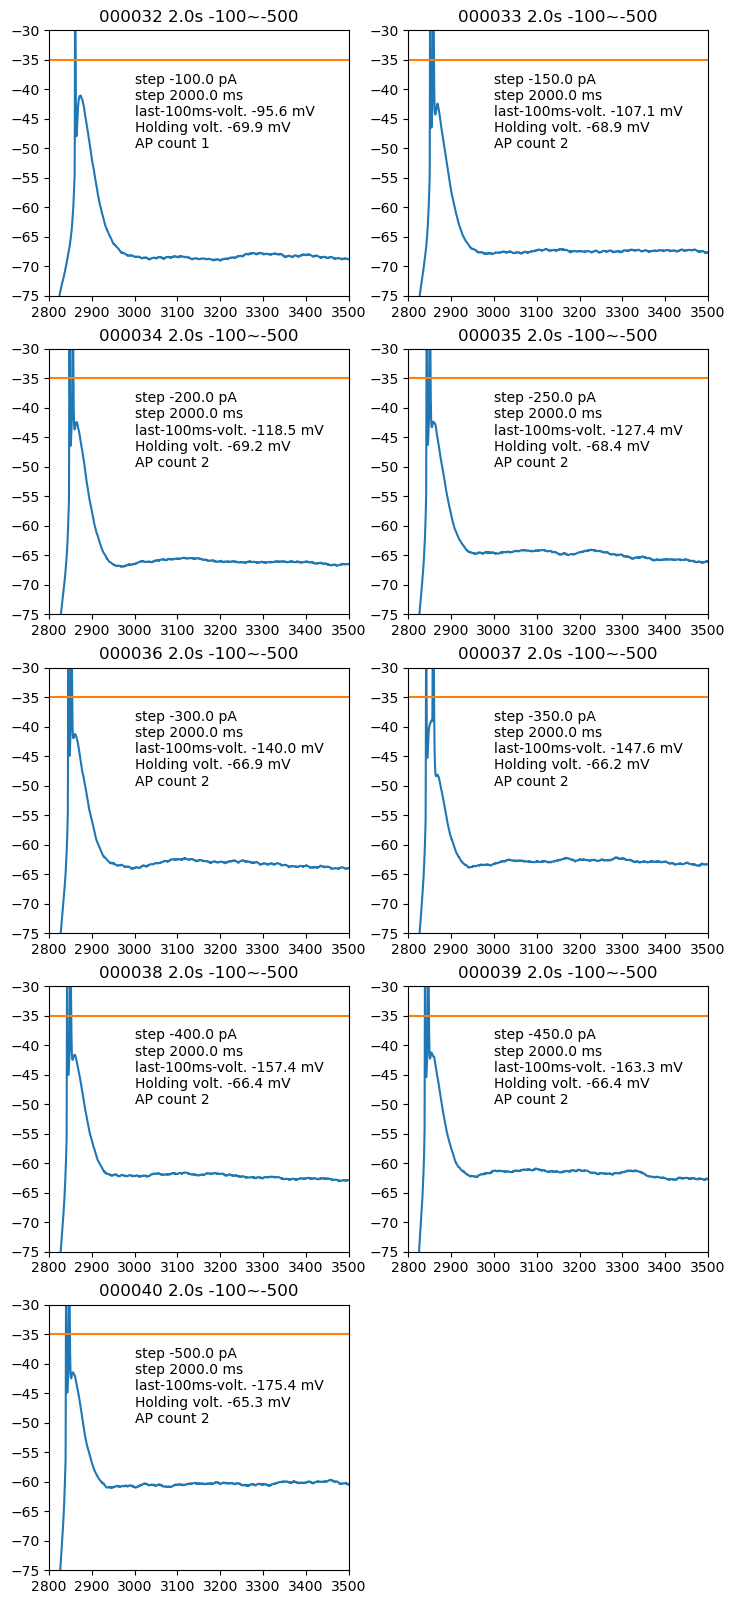



2018-07-16 Slice2c1 control
dataset/2018-07-16_NS/2018-07-16 Slice2c1 TBurst.hdf5


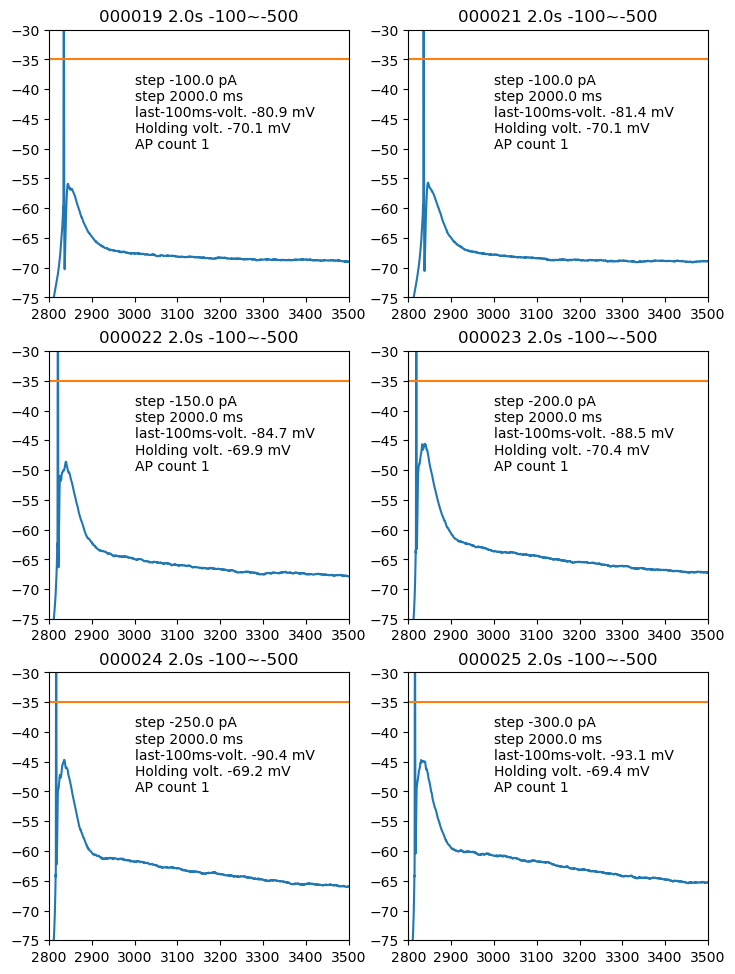

In [15]:
print_traces(data_tburst_2s[data_tburst_2s['state'] == 'control'])

2018-01-05 Slice1c2 6ohda
dataset/2018-01-05_NS/2018-01-05 Slice1c2TBurst.hdf5


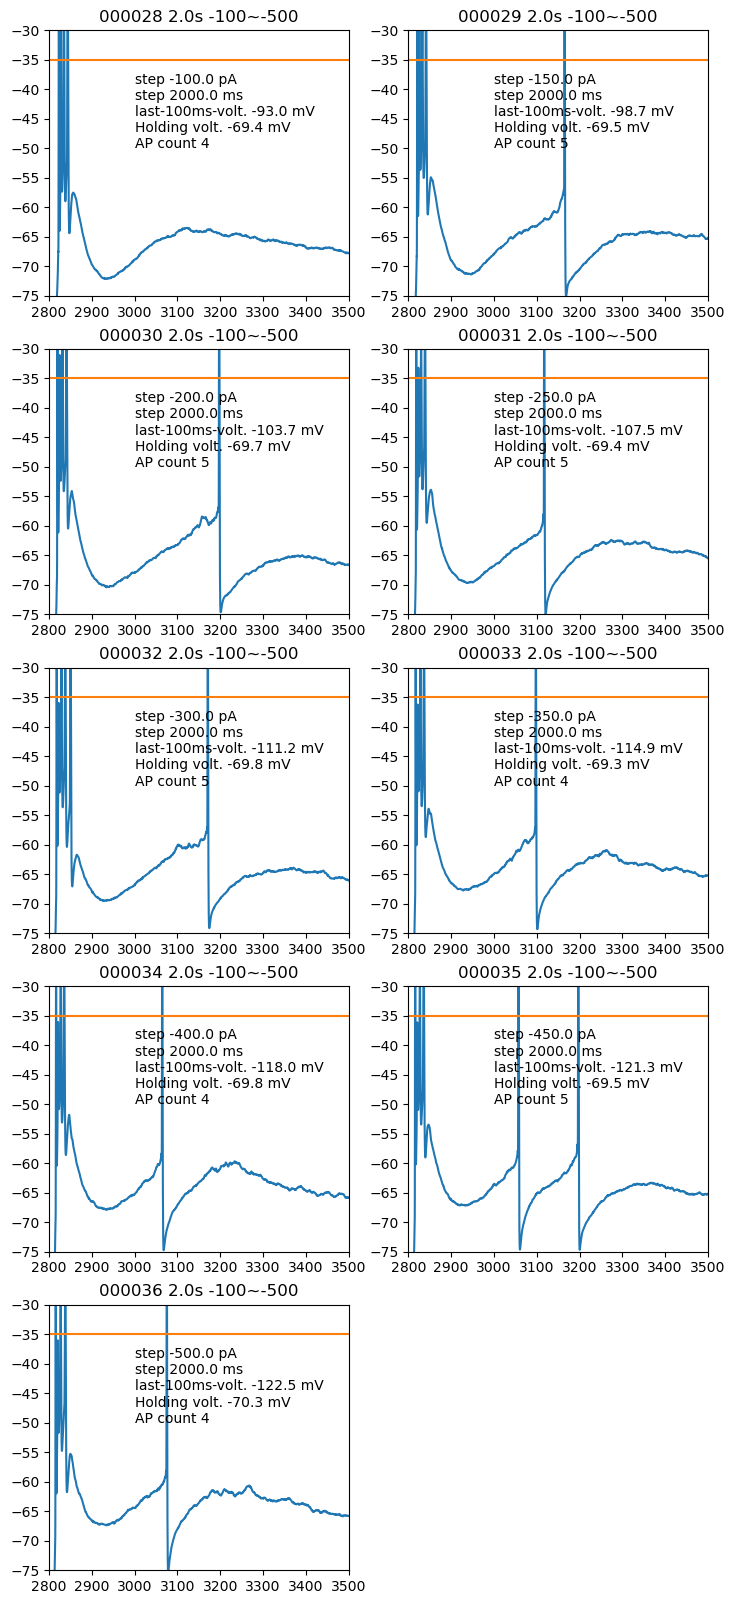



2018-03-30 Slice1c2 6ohda
dataset/2018-03-30_NS/2018-03-30 Slice1c2TBurst.hdf5


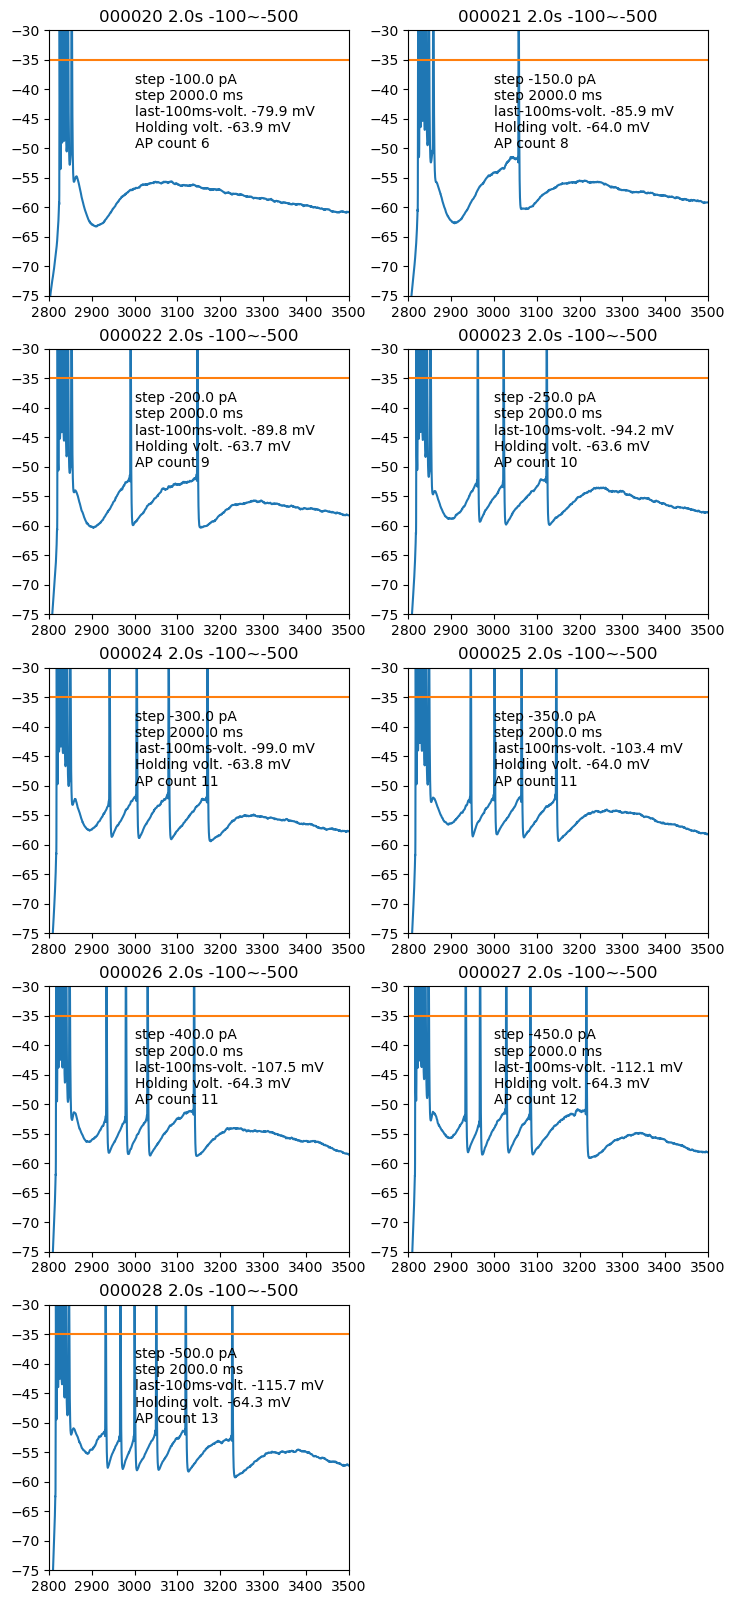



2018-04-04 Slice1c5 6ohda
dataset/2018-04-04_NS/2018-04-04 Slice1c5TBurst.hdf5


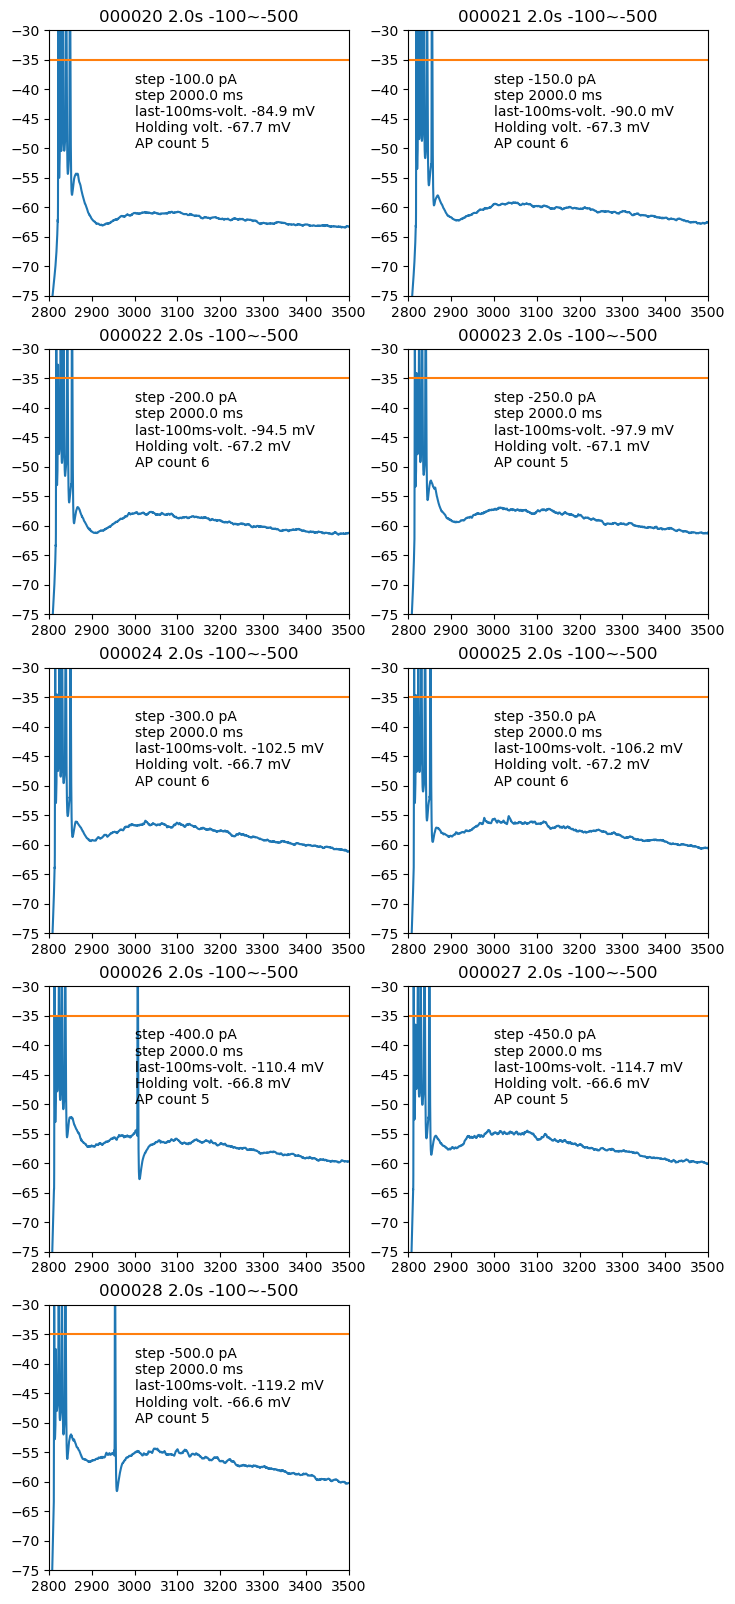



2018-07-18 Slice1c1 6ohda
dataset/2018-07-18_NS/2018-07-18 Slice1c1 TBurst.hdf5


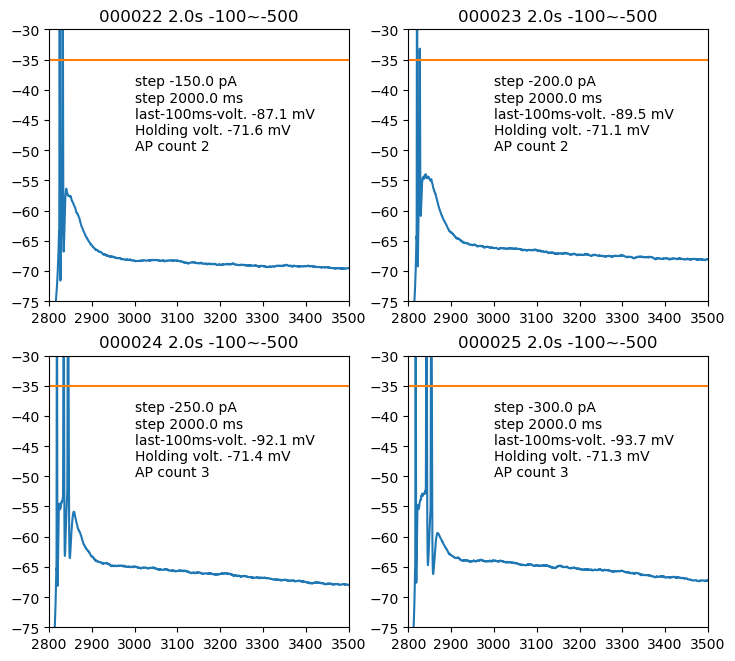



2018-07-18 Slice2c3 6ohda
dataset/2018-07-18_NS/2018-07-18 Slice2c3 TBurst_2.hdf5


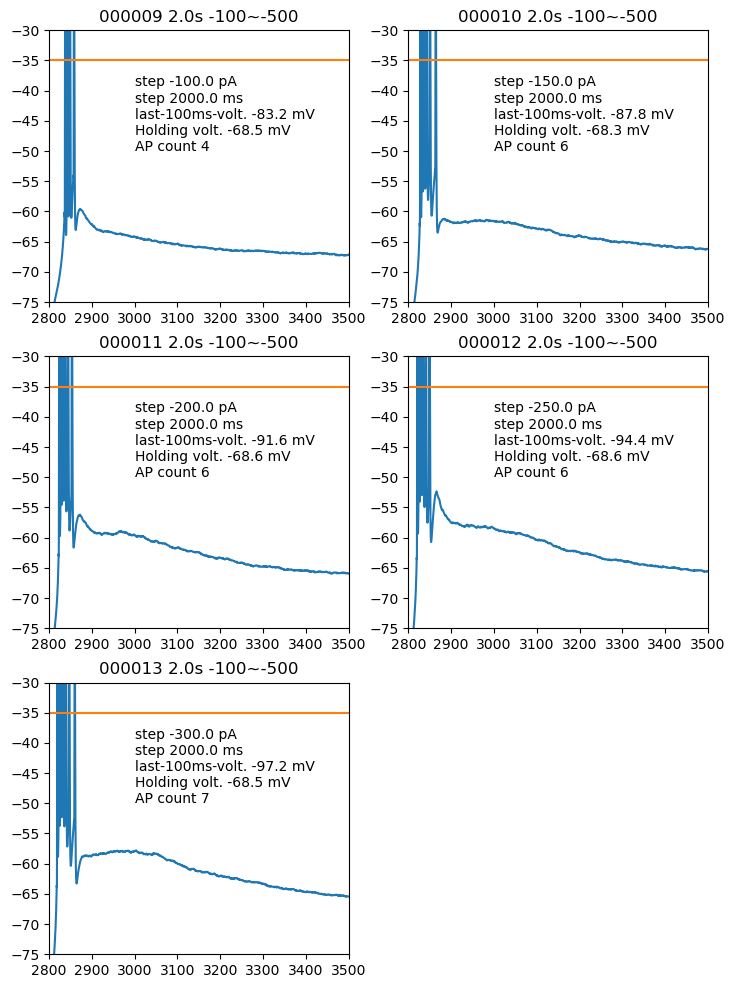



2018-07-25 Slice2c3 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice2c3TBurst.hdf5


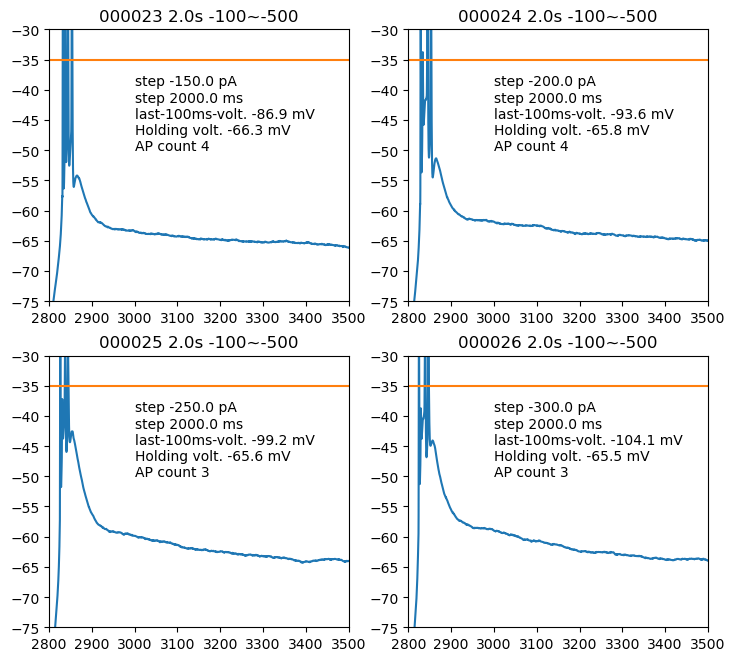



2018-07-25 Slice3c2 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice3c2TBurst.hdf5


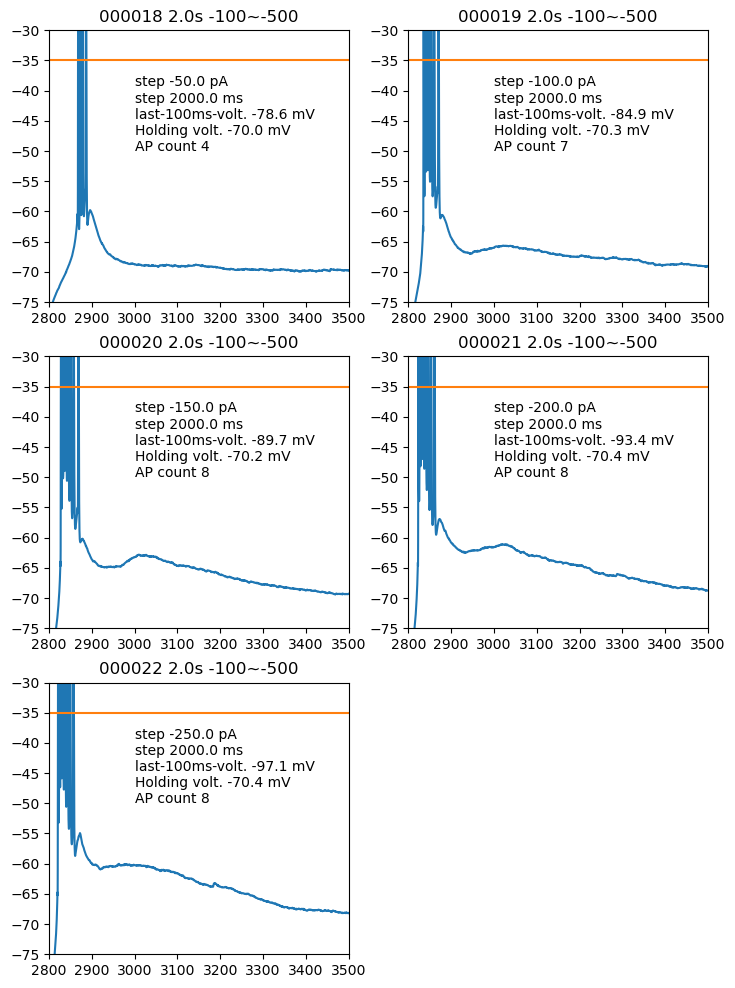



2018-07-25 Slice4c1 6ohda
dataset/2018-07-25_NS/2018-07-25 Slice4c1 TBurst.hdf5


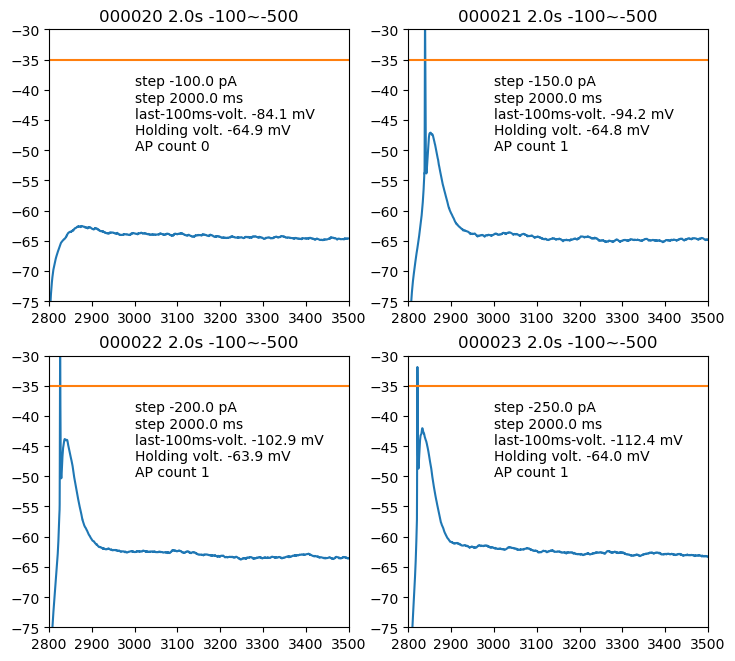



2018-08-03 Slice1c3 6ohda
dataset/2018-08-03_NS/2018-08-03 Slice1c3 TBurst.hdf5


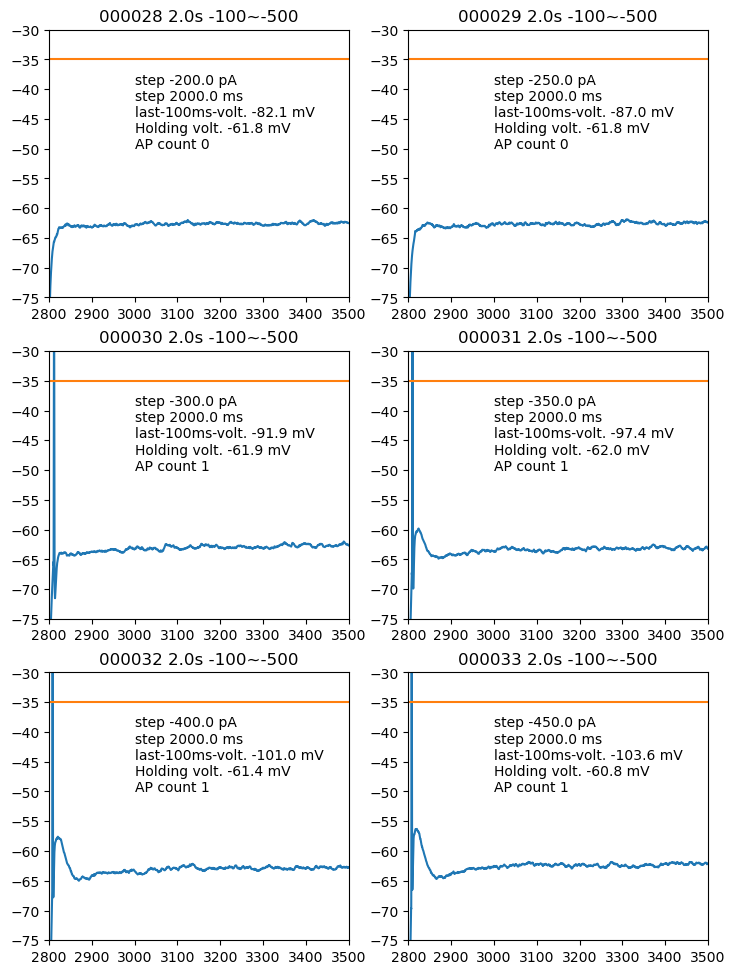

In [16]:
print_traces(data_tburst_2s[data_tburst_2s['state'] == '6ohda'])